In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

In [5]:
raw = pd.read_csv('./cleaned_joined_raw_data.csv')

In [6]:
raw.shape

(32989, 205)

In [7]:
wf_idx = (raw['has_wf'] == 1)

In [8]:
raw.dtypes

age_median_age                                                           float64
age_total_under_5_years                                                  float64
age_total_5_to_17_years                                                  float64
age_total_18_to_24_years                                                 float64
age_total_25_to_34_years                                                 float64
age_total_35_to_44_years                                                 float64
age_total_45_to_54_years                                                 float64
age_total_55_to_59_years                                                 float64
age_total_60_and_61_years                                                float64
age_total_62_to_64_years                                                 float64
age_total_65_to_74_years                                                 float64
age_total_75_years_and_over                                              float64
zip                         

In [9]:
raw.head()

,age_median_age,age_total_under_5_years,age_total_5_to_17_years,age_total_18_to_24_years,age_total_25_to_34_years,age_total_35_to_44_years,age_total_45_to_54_years,age_total_55_to_59_years,age_total_60_and_61_years,age_total_62_to_64_years,age_total_65_to_74_years,age_total_75_years_and_over,zip,year,births_total_women_15_to_50_years,births_women_who_had_a_birth_in_the_past_12_months,commute_total_commuters,commute_car_truck_or_van_drove_alone,commute_car_truck_or_van_carpooled,commute_public_transportation,commute_public_transportation_bus_or_trolley_bus,commute_public_transportation_streetcar_or_trolley_car,commute_public_transportation_subway_or_elevated,commute_public_transportation_railroad,commute_public_transportation_ferryboat,commute_taxicab,commute_motorcycle,commute_bicycle,commute_walked,commute_other_means,commute_worked_at_home,commute_leave_for_work_12_00_am_to_4_59_am,commute_leave_for_work_5_00_am_to_5_29_am,commute_leave_for_work_5_30_am_to_5_59_am,commute_leave_for_work_6_00_am_to_6_29_am,commute_leave_for_work_6_30_am_to_6_59_am,commute_leave_for_work_7_00_am_to_7_29_am,commute_leave_for_work_7_30_am_to_7_59_am,commute_leave_for_work_8_00_am_to_8_29_am,commute_leave_for_work_8_30_am_to_8_59_am,commute_leave_for_work_9_00_am_to_9_59_am,commute_leave_for_work_10_00_am_to_10_59_am,commute_leave_for_work_11_00_am_to_11_59_am,commute_leave_for_work_12_00_pm_to_3_59_pm,commute_leave_for_work_4_00_pm_to_11_59_pm,commute_less_than_5_minutes,commute_5_to_9_minutes,commute_10_to_14_minutes,commute_15_to_19_minutes,commute_20_to_24_minutes,commute_25_to_29_minutes,commute_30_to_34_minutes,commute_35_to_39_minutes,commute_40_to_44_minutes,commute_45_to_59_minutes,commute_60_to_89_minutes,commute_90_or_more_minutes,commute_no_vehicle_available,commute_1_vehicle_available,commute_2_vehicles_available,commute_3_vehicles_available,commute_4_vehicles_available,commute_5_or_more_vehicles_available,education_total_over_25,education_less_than_high_school_graduate,education_high_school_graduate,education_some_college_or_associates_degree,education_bachelors_degree,education_graduate_or_professional_degree,employment_total_pop_over_16,employment_in_labor_force,employment_civilian_labor_force,employment_civilian_labor_force_employed,employment_civilian_labor_force_unemployed,employment_armed_forces,employment_not_in_labor_force,household_type_total_households,household_type_family_households_married_couple_family,household_type_family_households_other_family,household_type_nonfamily_households_householder_living_alone,household_type_nonfamily_households_householder_not_living_alone,housing_units_total,housing_units_occupied,housing_units_vacant,housing_units_owner_occupied,housing_units_renter_occupied,housing_pop_total_in_occupied_housing,housing_pop_in_owner_occupied_housing,housing_pop_in_renter_occupied_housing,housing_units_1_detached_unit,housing_units_1_attached_unit,housing_units_2_unit,housing_units_3_or_4_unit,housing_units_5_to_9_unit,housing_units_10_to_19_unit,housing_units_20_to_49_unit,housing_units_50_or_more_unit,housing_units_mobile_home,housing_units_boat_rv_van_etc,housing_housing_home_value_total,housing_housing_home_value_less_than_10000,housing_housing_home_value_10000_to_14999,housing_home_value_15000_to_19999,housing_home_value_20000_to_24999,housing_home_value_25000_to_29999,housing_home_value_30000_to_34999,housing_home_value_35000_to_39999,housing_home_value_40000_to_49999,housing_home_value_50000_to_59999,housing_home_value_60000_to_69999,housing_home_value_70000_to_79999,housing_home_value_80000_to_89999,housing_home_value_90000_to_99999,housing_home_value_100000_to_124999,housing_home_value_125000_to_149999,housing_home_value_150000_to_174999,housing_home_value_175000_to_199999,housing_home_value_200000_to_249999,housing_home_value_250000_to_299999,housing_home_value_300000_to_399999,housing_home_value_400000_to_499999,housing_home_value_500000_to_749999,housing_home_value_750000_to_999999,housing_h

In [10]:
raw.drop(columns='year', inplace=True)

In [11]:
raw.head()

,age_median_age,age_total_under_5_years,age_total_5_to_17_years,age_total_18_to_24_years,age_total_25_to_34_years,age_total_35_to_44_years,age_total_45_to_54_years,age_total_55_to_59_years,age_total_60_and_61_years,age_total_62_to_64_years,age_total_65_to_74_years,age_total_75_years_and_over,zip,births_total_women_15_to_50_years,births_women_who_had_a_birth_in_the_past_12_months,commute_total_commuters,commute_car_truck_or_van_drove_alone,commute_car_truck_or_van_carpooled,commute_public_transportation,commute_public_transportation_bus_or_trolley_bus,commute_public_transportation_streetcar_or_trolley_car,commute_public_transportation_subway_or_elevated,commute_public_transportation_railroad,commute_public_transportation_ferryboat,commute_taxicab,commute_motorcycle,commute_bicycle,commute_walked,commute_other_means,commute_worked_at_home,commute_leave_for_work_12_00_am_to_4_59_am,commute_leave_for_work_5_00_am_to_5_29_am,commute_leave_for_work_5_30_am_to_5_59_am,commute_leave_for_work_6_00_am_to_6_29_am,commute_leave_for_work_6_30_am_to_6_59_am,commute_leave_for_work_7_00_am_to_7_29_am,commute_leave_for_work_7_30_am_to_7_59_am,commute_leave_for_work_8_00_am_to_8_29_am,commute_leave_for_work_8_30_am_to_8_59_am,commute_leave_for_work_9_00_am_to_9_59_am,commute_leave_for_work_10_00_am_to_10_59_am,commute_leave_for_work_11_00_am_to_11_59_am,commute_leave_for_work_12_00_pm_to_3_59_pm,commute_leave_for_work_4_00_pm_to_11_59_pm,commute_less_than_5_minutes,commute_5_to_9_minutes,commute_10_to_14_minutes,commute_15_to_19_minutes,commute_20_to_24_minutes,commute_25_to_29_minutes,commute_30_to_34_minutes,commute_35_to_39_minutes,commute_40_to_44_minutes,commute_45_to_59_minutes,commute_60_to_89_minutes,commute_90_or_more_minutes,commute_no_vehicle_available,commute_1_vehicle_available,commute_2_vehicles_available,commute_3_vehicles_available,commute_4_vehicles_available,commute_5_or_more_vehicles_available,education_total_over_25,education_less_than_high_school_graduate,education_high_school_graduate,education_some_college_or_associates_degree,education_bachelors_degree,education_graduate_or_professional_degree,employment_total_pop_over_16,employment_in_labor_force,employment_civilian_labor_force,employment_civilian_labor_force_employed,employment_civilian_labor_force_unemployed,employment_armed_forces,employment_not_in_labor_force,household_type_total_households,household_type_family_households_married_couple_family,household_type_family_households_other_family,household_type_nonfamily_households_householder_living_alone,household_type_nonfamily_households_householder_not_living_alone,housing_units_total,housing_units_occupied,housing_units_vacant,housing_units_owner_occupied,housing_units_renter_occupied,housing_pop_total_in_occupied_housing,housing_pop_in_owner_occupied_housing,housing_pop_in_renter_occupied_housing,housing_units_1_detached_unit,housing_units_1_attached_unit,housing_units_2_unit,housing_units_3_or_4_unit,housing_units_5_to_9_unit,housing_units_10_to_19_unit,housing_units_20_to_49_unit,housing_units_50_or_more_unit,housing_units_mobile_home,housing_units_boat_rv_van_etc,housing_housing_home_value_total,housing_housing_home_value_less_than_10000,housing_housing_home_value_10000_to_14999,housing_home_value_15000_to_19999,housing_home_value_20000_to_24999,housing_home_value_25000_to_29999,housing_home_value_30000_to_34999,housing_home_value_35000_to_39999,housing_home_value_40000_to_49999,housing_home_value_50000_to_59999,housing_home_value_60000_to_69999,housing_home_value_70000_to_79999,housing_home_value_80000_to_89999,housing_home_value_90000_to_99999,housing_home_value_100000_to_124999,housing_home_value_125000_to_149999,housing_home_value_150000_to_174999,housing_home_value_175000_to_199999,housing_home_value_200000_to_249999,housing_home_value_250000_to_299999,housing_home_value_300000_to_399999,housing_home_value_400000_to_499999,housing_home_value_500000_to_749999,housing_home_value_750000_to_999999,housing_home_v

In [12]:
print(raw.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32989 entries, 0 to 32988
Data columns (total 204 columns):
age_median_age                                                           float64
age_total_under_5_years                                                  float64
age_total_5_to_17_years                                                  float64
age_total_18_to_24_years                                                 float64
age_total_25_to_34_years                                                 float64
age_total_35_to_44_years                                                 float64
age_total_45_to_54_years                                                 float64
age_total_55_to_59_years                                                 float64
age_total_60_and_61_years                                                float64
age_total_62_to_64_years                                                 float64
age_total_65_to_74_years                                                 float64

### Transform features

In this section we transform redundant features, combine them, develop 'percentage variables' and standardize the data.

In [13]:
# pct of pop that is male

raw['total_population_male_pct'] = np.where(raw['total_population'] > 0, raw['total_population_male']/raw['total_population'], 0)

raw['total_population_male_pct'].isnull().any().sum()

raw.drop(columns=['total_population_male', 'total_population_female'], inplace=True)

In [14]:
# drop births probably not uniquely useful
raw.drop(columns=['births_total_women_15_to_50_years', 'births_women_who_had_a_birth_in_the_past_12_months'], inplace=True)

In [15]:
# look at pverty ratio
raw[['poverty_ratio_total',
 'poverty_ratio_under_.50',
 'poverty_ratio_.50_to_.99',
 'poverty_ratio_1.00_to_1.24',
 'poverty_ratio_1.25_to_1.49',
 'poverty_ratio_1.50_to_1.84',
 'poverty_ratio_1.85_to_1.99',
 'poverty_ratio_2.00_and_over']]

,poverty_ratio_total,poverty_ratio_under_.50,poverty_ratio_.50_to_.99,poverty_ratio_1.00_to_1.24,poverty_ratio_1.25_to_1.49,poverty_ratio_1.50_to_1.84,poverty_ratio_1.85_to_1.99,poverty_ratio_2.00_and_over
0,345,0,0,0,0,0,24,321
1,414,6,20,21,0,135,0,232
2,211,0,0,0,44,0,0,167
3,203,0,0,0,26,25,0,152
4,224,0,0,0,123,0,0,101
5,4353,500,441,87,223,269,302,2531
6,1649,59,225,137,81,133,76,938
7,199,0,29,20,4,13,0,133
8,358,22,24,27,14,18,46,207
9,9768,588,668,424,531,923,172,6462


## Calculate Percentages

Calculating percentages for various variables.


In [16]:

pov_rat_list = ['poverty_ratio_under_.50',
 'poverty_ratio_.50_to_.99',
 'poverty_ratio_1.00_to_1.24',
 'poverty_ratio_1.25_to_1.49',
 'poverty_ratio_1.50_to_1.84',
 'poverty_ratio_1.85_to_1.99',
 'poverty_ratio_2.00_and_over']

for c in pov_rat_list:
    raw[c+'_pct'] = np.where(raw['poverty_ratio_total'] > 0, raw[c]/raw['poverty_ratio_total'], 0)

In [17]:
# drop raw poverty ratio
raw.drop(columns=['poverty_ratio_total',
 'poverty_ratio_under_.50',
 'poverty_ratio_.50_to_.99',
 'poverty_ratio_1.00_to_1.24',
 'poverty_ratio_1.25_to_1.49',
 'poverty_ratio_1.50_to_1.84',
 'poverty_ratio_1.85_to_1.99',
 'poverty_ratio_2.00_and_over'], inplace=True)

In [18]:
def calc_pct_cols(df, cols, total_col, drop_cols=False, drop_total=False):
    for c in cols:
        df[c+'_pct'] = np.where(df[total_col] > 0, df[c]/df[total_col], 0)
    
    if drop_cols:
        df = df.drop(columns=cols)
    
    if drop_total:
        df = df.drop(columns=total_col)
        
    return df

In [19]:
race_cols = ['race_total_white',
 'race_total_black',
 'race_total_american_indian_and_alaska_native',
 'race_total_asian',
 'race_total_native_hawaiian_and_other_pacific_islander',
 'race_total_some_other_race',
 'race_total_two_or_more_races']

raw = calc_pct_cols(raw, race_cols, 'total_population', drop_cols=True)

In [20]:
cols = ['age_total_under_5_years',
 'age_total_5_to_17_years',
 'age_total_18_to_24_years',
 'age_total_25_to_34_years',
 'age_total_35_to_44_years',
 'age_total_45_to_54_years',
 'age_total_55_to_59_years',
 'age_total_60_and_61_years',
 'age_total_62_to_64_years',
 'age_total_65_to_74_years',
 'age_total_75_years_and_over']

raw = calc_pct_cols(raw, cols, 'total_population', drop_cols=True)

In [21]:
# drop commute leave time
raw.drop(columns=['commute_leave_for_work_12_00_am_to_4_59_am',
 'commute_leave_for_work_5_00_am_to_5_29_am',
 'commute_leave_for_work_5_30_am_to_5_59_am',
 'commute_leave_for_work_6_00_am_to_6_29_am',
 'commute_leave_for_work_6_30_am_to_6_59_am',
 'commute_leave_for_work_7_00_am_to_7_29_am',
 'commute_leave_for_work_7_30_am_to_7_59_am',
 'commute_leave_for_work_8_00_am_to_8_29_am',
 'commute_leave_for_work_8_30_am_to_8_59_am',
 'commute_leave_for_work_9_00_am_to_9_59_am',
 'commute_leave_for_work_10_00_am_to_10_59_am',
 'commute_leave_for_work_11_00_am_to_11_59_am',
 'commute_leave_for_work_12_00_pm_to_3_59_pm',
 'commute_leave_for_work_4_00_pm_to_11_59_pm'], inplace=True)

In [22]:
cols = ['commute_car_truck_or_van_drove_alone',
 'commute_car_truck_or_van_carpooled',
 'commute_public_transportation',
 'commute_public_transportation_bus_or_trolley_bus',
 'commute_public_transportation_streetcar_or_trolley_car',
 'commute_public_transportation_subway_or_elevated',
 'commute_public_transportation_railroad',
 'commute_public_transportation_ferryboat',
 'commute_taxicab',
 'commute_motorcycle',
 'commute_bicycle',
 'commute_walked',
 'commute_other_means',
 'commute_worked_at_home',
 'commute_less_than_5_minutes',
 'commute_5_to_9_minutes',
 'commute_10_to_14_minutes',
 'commute_15_to_19_minutes',
 'commute_20_to_24_minutes',
 'commute_25_to_29_minutes',
 'commute_30_to_34_minutes',
 'commute_35_to_39_minutes',
 'commute_40_to_44_minutes',
 'commute_45_to_59_minutes',
 'commute_60_to_89_minutes',
 'commute_90_or_more_minutes',
 'commute_no_vehicle_available',
 'commute_1_vehicle_available',
 'commute_2_vehicles_available',
 'commute_3_vehicles_available',
 'commute_4_vehicles_available',
 'commute_5_or_more_vehicles_available']

raw = calc_pct_cols(raw, cols, 'commute_total_commuters', drop_cols=True, drop_total=True)

In [23]:
cols = ['education_less_than_high_school_graduate',
 'education_high_school_graduate',
 'education_some_college_or_associates_degree',
 'education_bachelors_degree',
 'education_graduate_or_professional_degree']

raw = calc_pct_cols(raw, cols, 'education_total_over_25', drop_cols=True, drop_total=True)

In [24]:
cols = ['income_household_income_less_than_10000',
 'income_household_income_10000_to_14999',
 'income_household_income_15000_to_19999',
 'income_household_income_20000_to_24999',
 'income_household_income_25000_to_29999',
 'income_household_income_30000_to_34999',
 'income_household_income_35000_to_39999',
 'income_household_income_40000_to_44999',
 'income_household_income_45000_to_49999',
 'income_household_income_50000_to_59999',
 'income_household_income_60000_to_74999',
 'income_household_income_75000_to_99999',
 'income_household_income_100000_to_124999',
 'income_household_income_125000_to_149999',
 'income_household_income_150000_to_199999',
 'income_household_income_200000_or_more']

raw = calc_pct_cols(raw, cols, 'income_total_households', drop_cols=True, drop_total=True)

In [25]:
cols = ['school_enrollment_enrolled_in_school',
 'school_enrollment_enrolled_in_nursery_school_preschool',
 'school_enrollment_enrolled_in_kindergarten',
 'school_enrollment_enrolled_in_grade_1_to_grade_4',
 'school_enrollment_enrolled_in_grade_5_to_grade_8',
 'school_enrollment_enrolled_in_grade_9_to_grade_12',
 'school_enrollment_enrolled_in_college_undergraduate_years',
 'school_enrollment_graduate_or_professional_school',
 'school_enrollment_not_enrolled_in_school']

raw = calc_pct_cols(raw, cols, 'school_enrollment_total_over_3_years', drop_cols=True, drop_total=True)

In [26]:
cols = ['employment_in_labor_force',
 'employment_civilian_labor_force',
 'employment_civilian_labor_force_employed',
 'employment_civilian_labor_force_unemployed',
 'employment_armed_forces',
 'employment_not_in_labor_force']

raw = calc_pct_cols(raw, cols, 'employment_total_pop_over_16', drop_cols=True, drop_total=True)

In [27]:
raw['employment_employed_pct'] = raw['employment_armed_forces_pct'] + raw['employment_civilian_labor_force_employed_pct']
raw['employment_unemployed_pct'] = raw['employment_civilian_labor_force_unemployed_pct']

raw.drop(columns=['employment_civilian_labor_force_pct', 'employment_civilian_labor_force_employed_pct', 'employment_civilian_labor_force_unemployed_pct', 'employment_armed_forces_pct'], inplace=True)

In [28]:
cols = ['housing_units_occupied',
 'housing_units_vacant',
 'housing_units_owner_occupied',
 'housing_units_renter_occupied',
 'housing_units_1_detached_unit',
 'housing_units_1_attached_unit',
 'housing_units_2_unit',
 'housing_units_3_or_4_unit',
 'housing_units_5_to_9_unit',
 'housing_units_10_to_19_unit',
 'housing_units_20_to_49_unit',
 'housing_units_50_or_more_unit',
 'housing_units_mobile_home',
 'housing_units_boat_rv_van_etc']

raw = calc_pct_cols(raw, cols, 'housing_units_total', drop_cols=True)

In [29]:
cols = ['housing_housing_home_value_less_than_10000',
 'housing_housing_home_value_10000_to_14999',
 'housing_home_value_15000_to_19999',
 'housing_home_value_20000_to_24999',
 'housing_home_value_25000_to_29999',
 'housing_home_value_30000_to_34999',
 'housing_home_value_35000_to_39999',
 'housing_home_value_40000_to_49999',
 'housing_home_value_50000_to_59999',
 'housing_home_value_60000_to_69999',
 'housing_home_value_70000_to_79999',
 'housing_home_value_80000_to_89999',
 'housing_home_value_90000_to_99999',
 'housing_home_value_100000_to_124999',
 'housing_home_value_125000_to_149999',
 'housing_home_value_150000_to_174999',
 'housing_home_value_175000_to_199999',
 'housing_home_value_200000_to_249999',
 'housing_home_value_250000_to_299999',
 'housing_home_value_300000_to_399999',
 'housing_home_value_400000_to_499999',
 'housing_home_value_500000_to_749999',
 'housing_home_value_750000_to_999999',
 'housing_home_value_1000000_to_1499999',
 'housing_home_value_1500000_to_1999999',
 'housing_home_value_2000000_or_more']

raw = calc_pct_cols(raw, cols, 'housing_housing_home_value_total', drop_cols=True, drop_total=True)

In [30]:
cols = ['occupation_management_business_science_and_arts_occupations',
 'occupation_service_occupations',
 'occupation_sales_and_office_occupations',
 'occupation_natural_resources_construction_and_maintenance_occupations',
 'occupation_production_transportation_and_material_moving_occupations',
 'occupation_military_specific_occupations',
 'occupation_employee_of_private_company_workers',
 'occupation_self_employed_in_own_incorporated_business_workers',
 'occupation_private_not_for_profit_wage_and_salary_workers',
 'occupation_local_government_workers',
 'occupation_state_government_workers',
 'occupation_federal_government_workers',
 'occupation_self_employed_in_own_not_incorporated_business_workers',
 'occupation_unpaid_family_workers']

raw = calc_pct_cols(raw, cols, 'occupation_total', drop_cols=True, drop_total=True)

In [31]:
cols = ['marriage_total_never_married',
 'marriage_total_now_married_except_separated',
 'marriage_total_divorced',
 'marriage_total_separated',
 'marriage_total_widowed']

raw = calc_pct_cols(raw, cols, 'marriage_total_pop', drop_cols=True, drop_total=True)

In [32]:
cols = ['housing_pop_in_owner_occupied_housing',
 'housing_pop_in_renter_occupied_housing']

raw = calc_pct_cols(raw, cols, 'housing_pop_total_in_occupied_housing', drop_cols=True, drop_total=True)

raw.drop(columns='housing_pop_in_renter_occupied_housing_pct', inplace=True)

In [33]:
cols = ['household_type_family_households_married_couple_family',
 'household_type_family_households_other_family',
 'household_type_nonfamily_households_householder_living_alone',
 'household_type_nonfamily_households_householder_not_living_alone']

raw = calc_pct_cols(raw, cols, 'household_type_total_households', drop_cols=True, drop_total=True)

In [34]:
# drop marriage
raw.drop(columns=['marriage_total_never_married_pct',
 'marriage_total_now_married_except_separated_pct',
 'marriage_total_divorced_pct',
 'marriage_total_separated_pct',
 'marriage_total_widowed_pct'], inplace=True)

In [35]:
raw.shape

(32989, 168)

In [36]:
raw.to_csv('./cleaned_pct_data.csv', index=False)

### Feature Engineering

In this section we find many variables had floors and ceilings which could negatively impact our predictions. Many of the features, had a value of zero for some observations which was not realistic in many cases. So we did some engineering to get a more usable dataset, we also created new variables using the existing features.

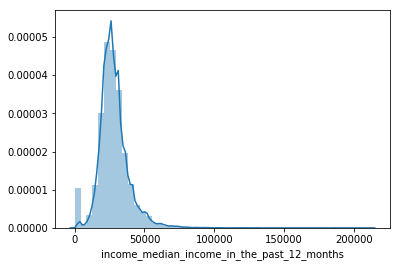

In [37]:
sns.distplot(raw['income_median_income_in_the_past_12_months'])

In [38]:
raw['income_median_income_in_the_past_12_months'] = np.where(raw['income_median_income_in_the_past_12_months']<1000, raw['income_median_income_in_the_past_12_months'].median(),raw['income_median_income_in_the_past_12_months'])

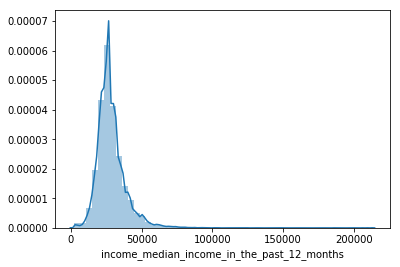

In [39]:
sns.distplot(raw['income_median_income_in_the_past_12_months'])

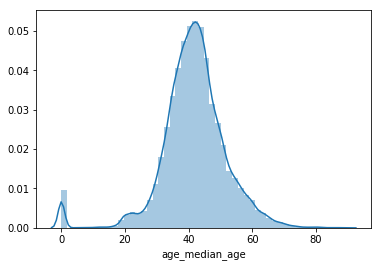

In [40]:
sns.distplot(raw['age_median_age'])

In [41]:
raw['age_median_age'] = np.where(raw['age_median_age'] == 0, raw['age_median_age'].median(), raw['age_median_age'])

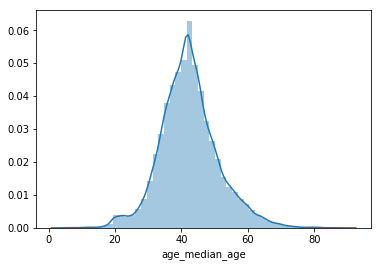

In [42]:
sns.distplot(raw['age_median_age'])

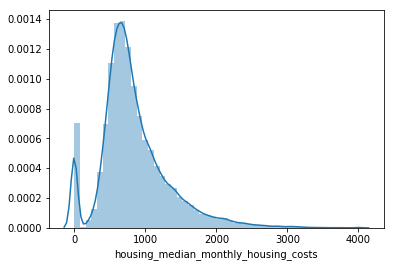

In [43]:
sns.distplot(raw['housing_median_monthly_housing_costs'])

In [44]:
raw[raw['housing_median_monthly_housing_costs'] == 0].shape

(1852, 168)

In [45]:
raw['housing_median_monthly_housing_costs'] = np.where(raw['housing_median_monthly_housing_costs'] == 0, raw['housing_median_monthly_housing_costs'].median(), raw['housing_median_monthly_housing_costs'])

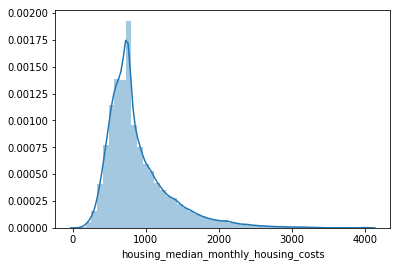

In [46]:
sns.distplot(raw['housing_median_monthly_housing_costs'])

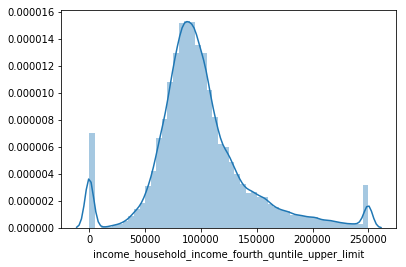

In [47]:
sns.distplot(raw['income_household_income_fourth_quntile_upper_limit'])

In [48]:
raw[raw['total_population']==0].shape

(315, 168)

In [49]:
raw = raw[raw['total_population']>0]

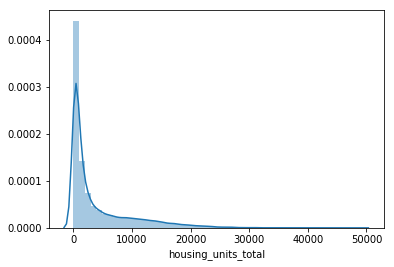

In [50]:
sns.distplot(raw['housing_units_total'])

In [51]:
raw[raw['housing_units_total'] == 0].shape

(238, 168)

In [52]:
raw = raw[raw['housing_units_total']>0]

In [53]:
raw.columns.tolist()

['age_median_age',
 'zip',
 'housing_units_total',
 'housing_median_monthly_housing_costs',
 'income_households_with_public_assistance_income',
 'income_households_no_public_assistance_income',
 'income_household_income_lowest_quntile_upper_limit',
 'income_household_income_second_quntile_upper_limit',
 'income_household_income_third_quntile_upper_limit',
 'income_household_income_fourth_quntile_upper_limit',
 'income_lower_limit_of_top_5_percent',
 'income_gini_index_of_income_inequality',
 'income_per_capita_income_in_the_past_12_months',
 'income_median_income_in_the_past_12_months',
 'total_population',
 'has_wf',
 'land_area',
 'total_population_male_pct',
 'poverty_ratio_under_.50_pct',
 'poverty_ratio_.50_to_.99_pct',
 'poverty_ratio_1.00_to_1.24_pct',
 'poverty_ratio_1.25_to_1.49_pct',
 'poverty_ratio_1.50_to_1.84_pct',
 'poverty_ratio_1.85_to_1.99_pct',
 'poverty_ratio_2.00_and_over_pct',
 'race_total_white_pct',
 'race_total_black_pct',
 'race_total_american_indian_and_alaska

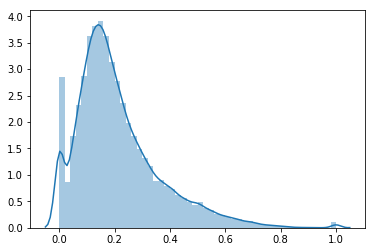

In [54]:
sns.distplot(raw[['income_household_income_100000_to_124999_pct',
                                'income_household_income_125000_to_149999_pct',
                                'income_household_income_150000_to_199999_pct',
                                'income_household_income_200000_or_more_pct']].sum(axis=1))

In [55]:
raw[['income_household_income_100000_to_124999_pct',
                                'income_household_income_125000_to_149999_pct',
                                'income_household_income_150000_to_199999_pct',
                                'income_household_income_200000_or_more_pct']].sum(axis=1).describe()

count    32436.000000
mean         0.211674
std          0.152298
min          0.000000
25%          0.110773
50%          0.176334
75%          0.278380
max          1.000000
dtype: float64

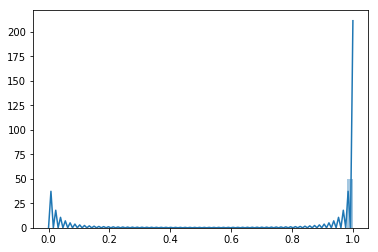

In [56]:
sns.distplot(raw[['income_household_income_less_than_10000_pct',
 'income_household_income_10000_to_14999_pct',
 'income_household_income_15000_to_19999_pct',
 'income_household_income_20000_to_24999_pct',
 'income_household_income_25000_to_29999_pct',
 'income_household_income_30000_to_34999_pct',
 'income_household_income_35000_to_39999_pct',
 'income_household_income_40000_to_44999_pct',
 'income_household_income_45000_to_49999_pct',
 'income_household_income_50000_to_59999_pct',
 'income_household_income_60000_to_74999_pct',
 'income_household_income_75000_to_99999_pct',
 'income_household_income_100000_to_124999_pct',
 'income_household_income_125000_to_149999_pct',
 'income_household_income_150000_to_199999_pct',
 'income_household_income_200000_or_more_pct']].sum(axis=1))

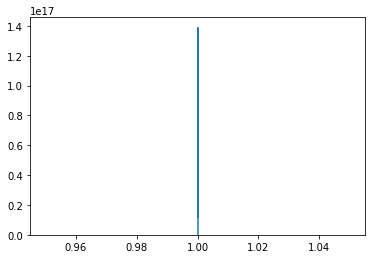

In [57]:
sns.distplot(raw[['housing_units_1_detached_unit_pct',
 'housing_units_1_attached_unit_pct',
 'housing_units_2_unit_pct',
 'housing_units_3_or_4_unit_pct',
 'housing_units_5_to_9_unit_pct',
 'housing_units_10_to_19_unit_pct',
 'housing_units_20_to_49_unit_pct',
 'housing_units_50_or_more_unit_pct',
 'housing_units_mobile_home_pct',
 'housing_units_boat_rv_van_etc_pct']].sum(axis=1))

In [58]:
raw[raw[['income_household_income_less_than_10000_pct',
 'income_household_income_10000_to_14999_pct',
 'income_household_income_15000_to_19999_pct',
 'income_household_income_20000_to_24999_pct',
 'income_household_income_25000_to_29999_pct',
 'income_household_income_30000_to_34999_pct',
 'income_household_income_35000_to_39999_pct',
 'income_household_income_40000_to_44999_pct',
 'income_household_income_45000_to_49999_pct',
 'income_household_income_50000_to_59999_pct',
 'income_household_income_60000_to_74999_pct',
 'income_household_income_75000_to_99999_pct',
 'income_household_income_100000_to_124999_pct',
 'income_household_income_125000_to_149999_pct',
 'income_household_income_150000_to_199999_pct',
 'income_household_income_200000_or_more_pct']].sum(axis=1)<1].shape

(2796, 168)

In [59]:
raw = raw[raw[['income_household_income_less_than_10000_pct',
 'income_household_income_10000_to_14999_pct',
 'income_household_income_15000_to_19999_pct',
 'income_household_income_20000_to_24999_pct',
 'income_household_income_25000_to_29999_pct',
 'income_household_income_30000_to_34999_pct',
 'income_household_income_35000_to_39999_pct',
 'income_household_income_40000_to_44999_pct',
 'income_household_income_45000_to_49999_pct',
 'income_household_income_50000_to_59999_pct',
 'income_household_income_60000_to_74999_pct',
 'income_household_income_75000_to_99999_pct',
 'income_household_income_100000_to_124999_pct',
 'income_household_income_125000_to_149999_pct',
 'income_household_income_150000_to_199999_pct',
 'income_household_income_200000_or_more_pct']].sum(axis=1)==1]

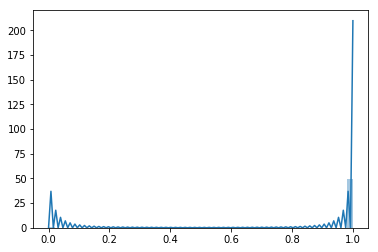

In [60]:
sns.distplot(raw[['housing_housing_home_value_less_than_10000_pct',
 'housing_housing_home_value_10000_to_14999_pct',
 'housing_home_value_15000_to_19999_pct',
 'housing_home_value_20000_to_24999_pct',
 'housing_home_value_25000_to_29999_pct',
 'housing_home_value_30000_to_34999_pct',
 'housing_home_value_35000_to_39999_pct',
 'housing_home_value_40000_to_49999_pct',
 'housing_home_value_50000_to_59999_pct',
 'housing_home_value_60000_to_69999_pct',
 'housing_home_value_70000_to_79999_pct',
 'housing_home_value_80000_to_89999_pct',
 'housing_home_value_90000_to_99999_pct',
 'housing_home_value_100000_to_124999_pct',
 'housing_home_value_125000_to_149999_pct',
 'housing_home_value_150000_to_174999_pct',
 'housing_home_value_175000_to_199999_pct',
 'housing_home_value_200000_to_249999_pct',
 'housing_home_value_250000_to_299999_pct',
 'housing_home_value_300000_to_399999_pct',
 'housing_home_value_400000_to_499999_pct',
 'housing_home_value_500000_to_749999_pct',
 'housing_home_value_750000_to_999999_pct',
 'housing_home_value_1000000_to_1499999_pct',
 'housing_home_value_1500000_to_1999999_pct',
 'housing_home_value_2000000_or_more_pct']].sum(axis=1))

In [61]:
raw[raw[['housing_housing_home_value_less_than_10000_pct',
 'housing_housing_home_value_10000_to_14999_pct',
 'housing_home_value_15000_to_19999_pct',
 'housing_home_value_20000_to_24999_pct',
 'housing_home_value_25000_to_29999_pct',
 'housing_home_value_30000_to_34999_pct',
 'housing_home_value_35000_to_39999_pct',
 'housing_home_value_40000_to_49999_pct',
 'housing_home_value_50000_to_59999_pct',
 'housing_home_value_60000_to_69999_pct',
 'housing_home_value_70000_to_79999_pct',
 'housing_home_value_80000_to_89999_pct',
 'housing_home_value_90000_to_99999_pct',
 'housing_home_value_100000_to_124999_pct',
 'housing_home_value_125000_to_149999_pct',
 'housing_home_value_150000_to_174999_pct',
 'housing_home_value_175000_to_199999_pct',
 'housing_home_value_200000_to_249999_pct',
 'housing_home_value_250000_to_299999_pct',
 'housing_home_value_300000_to_399999_pct',
 'housing_home_value_400000_to_499999_pct',
 'housing_home_value_500000_to_749999_pct',
 'housing_home_value_750000_to_999999_pct',
 'housing_home_value_1000000_to_1499999_pct',
 'housing_home_value_1500000_to_1999999_pct',
 'housing_home_value_2000000_or_more_pct']].sum(axis=1) == 0].shape

(237, 168)

In [62]:
raw = raw[raw[['housing_housing_home_value_less_than_10000_pct',
 'housing_housing_home_value_10000_to_14999_pct',
 'housing_home_value_15000_to_19999_pct',
 'housing_home_value_20000_to_24999_pct',
 'housing_home_value_25000_to_29999_pct',
 'housing_home_value_30000_to_34999_pct',
 'housing_home_value_35000_to_39999_pct',
 'housing_home_value_40000_to_49999_pct',
 'housing_home_value_50000_to_59999_pct',
 'housing_home_value_60000_to_69999_pct',
 'housing_home_value_70000_to_79999_pct',
 'housing_home_value_80000_to_89999_pct',
 'housing_home_value_90000_to_99999_pct',
 'housing_home_value_100000_to_124999_pct',
 'housing_home_value_125000_to_149999_pct',
 'housing_home_value_150000_to_174999_pct',
 'housing_home_value_175000_to_199999_pct',
 'housing_home_value_200000_to_249999_pct',
 'housing_home_value_250000_to_299999_pct',
 'housing_home_value_300000_to_399999_pct',
 'housing_home_value_400000_to_499999_pct',
 'housing_home_value_500000_to_749999_pct',
 'housing_home_value_750000_to_999999_pct',
 'housing_home_value_1000000_to_1499999_pct',
 'housing_home_value_1500000_to_1999999_pct',
 'housing_home_value_2000000_or_more_pct']].sum(axis=1) != 0]

In [63]:
raw.shape

(29351, 168)

In [64]:
eng = raw[['zip', 'has_wf']]

In [65]:
# pop density
eng['total_population_density'] = np.where(raw['land_area'] > 0, raw['total_population']/raw['land_area'], 0)
eng['total_population_density'].isnull().any().sum()

0

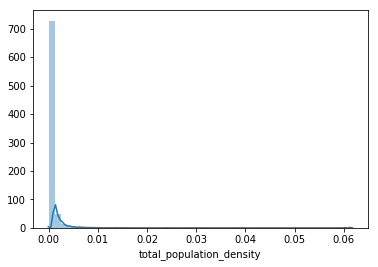

In [66]:
sns.distplot(eng['total_population_density'])
plt.show()

In [67]:
eng['total_population_density'].describe()

count    2.935100e+04
mean     4.780948e-04
std      1.843327e-03
min      1.599535e-09
25%      7.969923e-06
50%      3.067788e-05
75%      2.487961e-04
max      6.173686e-02
Name: total_population_density, dtype: float64

In [68]:
eng[eng['has_wf'] == 1]['total_population_density'].describe()

count    446.000000
mean       0.002693
std        0.004560
min        0.000010
25%        0.000740
50%        0.001367
75%        0.002594
max        0.048482
Name: total_population_density, dtype: float64

In [69]:
eng[eng['has_wf'] == 0]['total_population_density'].describe()

count    2.890500e+04
mean     4.439255e-04
std      1.747363e-03
min      1.599535e-09
25%      7.785976e-06
50%      2.943371e-05
75%      2.216253e-04
max      6.173686e-02
Name: total_population_density, dtype: float64

In [70]:
# looks like a useful predictor

In [71]:
# housing density
eng['total_housing_unit_density'] = np.where(raw['land_area'] > 0, raw['housing_units_total']/raw['land_area'], 0)
raw['housing_units_total'].isnull().any().sum()

0

In [72]:
# scale non categorical data
from sklearn.preprocessing import StandardScaler

columns_to_scale = [c for c in raw.columns if '_pct' not in c and '_cat' not in c]
columns_to_scale.remove('has_wf')

for c in columns_to_scale:
    s = StandardScaler()
    raw[c] = s.fit_transform(X=raw[c].values.reshape(-1, 1))

In [73]:
raw.loc[wf_idx, [
 'income_household_income_100000_to_124999_pct',
 'income_household_income_125000_to_149999_pct',
 'income_household_income_150000_to_199999_pct',
 'income_household_income_200000_or_more_pct']].sum(axis=1).describe()

count    446.000000
mean       0.408524
std        0.149443
min        0.044638
25%        0.297293
50%        0.414051
75%        0.510505
max        0.836876
dtype: float64

In [74]:
raw.loc[~wf_idx, [
 'income_household_income_100000_to_124999_pct',
 'income_household_income_125000_to_149999_pct',
 'income_household_income_150000_to_199999_pct',
 'income_household_income_200000_or_more_pct']].sum(axis=1).describe()

count    28905.000000
mean         0.209440
std          0.148999
min          0.000000
25%          0.110905
50%          0.175258
75%          0.274336
max          1.000000
dtype: float64

In [75]:
eng['is_rich_pct'] = raw[['income_household_income_100000_to_124999_pct',
                                'income_household_income_125000_to_149999_pct',
                                'income_household_income_150000_to_199999_pct',
                                'income_household_income_200000_or_more_pct']].sum(axis=1)

In [76]:
eng.shape

(29351, 5)

In [77]:
ed_wf = (raw.loc[wf_idx, 'education_bachelors_degree_pct']+raw.loc[wf_idx, 'education_graduate_or_professional_degree_pct']).mean()
uned_wf = (raw.loc[~wf_idx, 'education_bachelors_degree_pct']+raw.loc[~wf_idx, 'education_graduate_or_professional_degree_pct']).mean()

In [78]:
(raw.loc[wf_idx, 'education_bachelors_degree_pct']+raw.loc[wf_idx, 'education_graduate_or_professional_degree_pct']).describe([.05,.1,.25,.5,.75,.9,.95])

count    446.000000
mean       0.560901
std        0.156374
min        0.077586
5%         0.298707
10%        0.356139
25%        0.447385
50%        0.572167
75%        0.681828
90%        0.759619
95%        0.803295
max        0.885467
dtype: float64

In [79]:
(raw.loc[~wf_idx, 'education_bachelors_degree_pct']+raw.loc[~wf_idx, 'education_graduate_or_professional_degree_pct']).describe([.05,.1,.25,.5,.75,.9,.95])

count    28905.000000
mean         0.231368
std          0.158476
min          0.000000
5%           0.042924
10%          0.076923
25%          0.126940
50%          0.190271
75%          0.296104
90%          0.454944
95%          0.557177
max          1.000000
dtype: float64

In [80]:
x = [uned_wf, ed_wf]
y = [0,1]

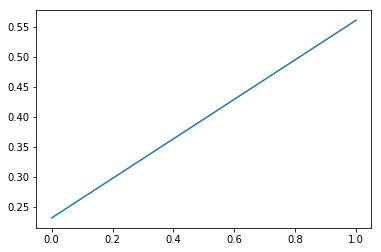

In [81]:
plt.plot(y, x)

In [82]:
# education is clearly important

In [83]:
eng['has_higher_ed_pct'] = raw['education_bachelors_degree_pct']+raw['education_graduate_or_professional_degree_pct']

In [84]:
eng.shape

(29351, 6)

In [85]:
raw.loc[~wf_idx, [
 'school_enrollment_enrolled_in_college_undergraduate_years_pct',
 'school_enrollment_graduate_or_professional_school_pct']].sum(axis=1).describe()


count    28905.000000
mean         0.049599
std          0.057112
min          0.000000
25%          0.024014
50%          0.041431
75%          0.061031
max          0.998193
dtype: float64

In [86]:
raw.loc[wf_idx, [
 'school_enrollment_enrolled_in_college_undergraduate_years_pct',
 'school_enrollment_graduate_or_professional_school_pct']].sum(axis=1).describe()

count    446.000000
mean       0.093056
std        0.074932
min        0.016333
25%        0.056765
50%        0.071646
75%        0.099783
max        0.603567
dtype: float64

In [87]:
eng['in_college_pct'] = raw[['school_enrollment_enrolled_in_college_undergraduate_years_pct',
 'school_enrollment_graduate_or_professional_school_pct']].sum(axis=1)

In [88]:
eng.shape

(29351, 7)

In [89]:
raw[['income_per_capita_income_in_the_past_12_months',
 'income_median_income_in_the_past_12_months', 'has_wf']].corr()

,income_per_capita_income_in_the_past_12_months,income_median_income_in_the_past_12_months,has_wf
income_per_capita_income_in_the_past_12_months,1.000000,0.790892,0.209529
income_median_income_in_the_past_12_months,0.790892,1.000000,0.183084
has_wf,0.209529,0.183084,1.000000


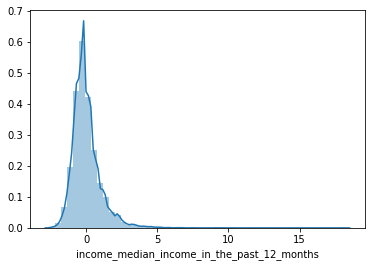

In [90]:
sns.distplot(raw['income_median_income_in_the_past_12_months'])

In [91]:
eng['income_median_income_in_the_past_12_months'] = raw['income_median_income_in_the_past_12_months']

In [92]:
raw[['income_per_capita_income_in_the_past_12_months',
 'income_median_income_in_the_past_12_months', 'has_wf']].corr()

,income_per_capita_income_in_the_past_12_months,income_median_income_in_the_past_12_months,has_wf
income_per_capita_income_in_the_past_12_months,1.000000,0.790892,0.209529
income_median_income_in_the_past_12_months,0.790892,1.000000,0.183084
has_wf,0.209529,0.183084,1.000000


In [93]:
eng.shape

(29351, 8)

In [94]:
eng['income_gini_index_of_income_inequality'] = raw['income_gini_index_of_income_inequality']
eng['total_population'] = raw['total_population']
eng['total_population_male_pct'] = raw['total_population_male_pct']

In [95]:
l = ['race_total_white_pct',
 'race_total_black_pct',
 'race_total_american_indian_and_alaska_native_pct',
 'race_total_asian_pct',
 'race_total_native_hawaiian_and_other_pacific_islander_pct',
 'race_total_some_other_race_pct',
 'race_total_two_or_more_races_pct',
 'age_total_under_5_years_pct',
 'age_total_5_to_17_years_pct',
 'age_total_18_to_24_years_pct',
 'age_total_25_to_34_years_pct',
 'age_total_35_to_44_years_pct',
 'age_total_45_to_54_years_pct',
 'age_total_55_to_59_years_pct',
 'age_total_60_and_61_years_pct',
 'age_total_62_to_64_years_pct',
 'age_total_65_to_74_years_pct',
 'age_total_75_years_and_over_pct']

for i in l:
    eng[i] = raw[i]

In [96]:
l = ['commute_car_truck_or_van_drove_alone_pct',
 'commute_car_truck_or_van_carpooled_pct',
 'commute_public_transportation_pct',
    'commute_taxicab_pct',
 'commute_motorcycle_pct',
 'commute_bicycle_pct',
 'commute_walked_pct',
 'commute_other_means_pct',
 'commute_worked_at_home_pct']

for i in l:
    eng[i] = raw[i]

In [97]:
l = ['commute_less_than_5_minutes_pct',
 'commute_5_to_9_minutes_pct',
 'commute_10_to_14_minutes_pct',
 'commute_15_to_19_minutes_pct',
 'commute_20_to_24_minutes_pct',
 'commute_25_to_29_minutes_pct',
 'commute_30_to_34_minutes_pct',
 'commute_35_to_39_minutes_pct',
 'commute_40_to_44_minutes_pct',
 'commute_45_to_59_minutes_pct',
 'commute_60_to_89_minutes_pct',
 'commute_90_or_more_minutes_pct'
    ]

for i in l:
    eng[i] = raw[i]

In [98]:
l = ['employment_employed_pct',
 'employment_unemployed_pct',
     'housing_units_occupied_pct',
    'housing_units_owner_occupied_pct']

for i in l:
    eng[i] = raw[i]

In [99]:
eng['housing_high_value'] = raw[['housing_home_value_500000_to_749999_pct',
 'housing_home_value_750000_to_999999_pct',
 'housing_home_value_1000000_to_1499999_pct',
 'housing_home_value_1500000_to_1999999_pct',
 'housing_home_value_2000000_or_more_pct']].sum(axis=1)

eng['housing_mid_value'] = raw[['housing_home_value_150000_to_174999_pct',
 'housing_home_value_175000_to_199999_pct',
 'housing_home_value_200000_to_249999_pct',
 'housing_home_value_250000_to_299999_pct',
 'housing_home_value_300000_to_399999_pct',
 'housing_home_value_400000_to_499999_pct']].sum(axis=1)

eng['housing_low_value'] = raw[['housing_housing_home_value_less_than_10000_pct',
 'housing_housing_home_value_10000_to_14999_pct',
 'housing_home_value_15000_to_19999_pct',
 'housing_home_value_20000_to_24999_pct',
 'housing_home_value_25000_to_29999_pct',
 'housing_home_value_30000_to_34999_pct',
 'housing_home_value_35000_to_39999_pct',
 'housing_home_value_40000_to_49999_pct',
 'housing_home_value_50000_to_59999_pct',
 'housing_home_value_60000_to_69999_pct',
 'housing_home_value_70000_to_79999_pct',
 'housing_home_value_80000_to_89999_pct',
 'housing_home_value_90000_to_99999_pct',
 'housing_home_value_100000_to_124999_pct',
 'housing_home_value_125000_to_149999_pct']].sum(axis=1)

In [100]:
eng.shape

(29351, 57)

## Improving our understanding of the data

In this section we seek to better understand the features in our data set and the correlation with our target variable.

In [101]:
eng.columns.tolist()

['zip',
 'has_wf',
 'total_population_density',
 'total_housing_unit_density',
 'is_rich_pct',
 'has_higher_ed_pct',
 'in_college_pct',
 'income_median_income_in_the_past_12_months',
 'income_gini_index_of_income_inequality',
 'total_population',
 'total_population_male_pct',
 'race_total_white_pct',
 'race_total_black_pct',
 'race_total_american_indian_and_alaska_native_pct',
 'race_total_asian_pct',
 'race_total_native_hawaiian_and_other_pacific_islander_pct',
 'race_total_some_other_race_pct',
 'race_total_two_or_more_races_pct',
 'age_total_under_5_years_pct',
 'age_total_5_to_17_years_pct',
 'age_total_18_to_24_years_pct',
 'age_total_25_to_34_years_pct',
 'age_total_35_to_44_years_pct',
 'age_total_45_to_54_years_pct',
 'age_total_55_to_59_years_pct',
 'age_total_60_and_61_years_pct',
 'age_total_62_to_64_years_pct',
 'age_total_65_to_74_years_pct',
 'age_total_75_years_and_over_pct',
 'commute_car_truck_or_van_drove_alone_pct',
 'commute_car_truck_or_van_carpooled_pct',
 'commut

## Finding correlated and highly correlated features

To limit our perspective, we looked at features which have a correlation of greater than 0.30 and greater than 0.50.

In [102]:
# map features to their absolute correlation values
corr1 = eng.corr().abs()

# set equality (self correlation) as zero
corr1[corr1 == 1] = 0

# of each feature, find the max correlation
# and sort the resulting array in ascending order
corr1_cols = corr1.max().sort_values(ascending=False)

# display the highly correlated features
v=pd.DataFrame(corr1_cols[corr1_cols > 0.3])

In [104]:
new1 = eng[['total_population_density', 'total_housing_unit_density','housing_low_value','housing_mid_value','race_total_white_pct','race_total_black_pct','commute_public_transportation_pct','income_median_income_in_the_past_12_months','is_rich_pct','housing_units_owner_occupied_pct','housing_units_occupied_pct','housing_high_value','has_higher_ed_pct','commute_walked_pct','commute_car_truck_or_van_drove_alone_pct','has_wf']]

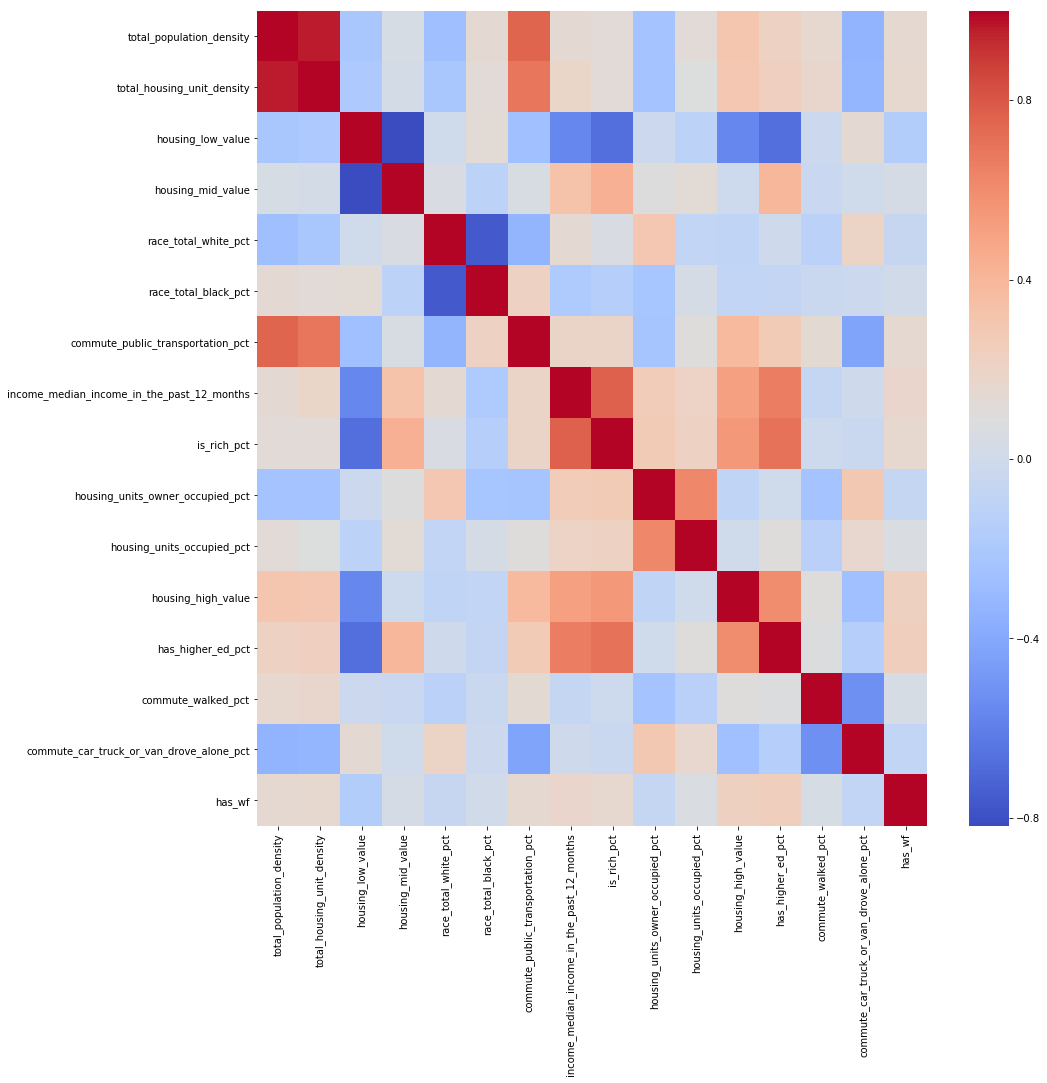

In [105]:
corr11 = new1.corr()
f, ax = plt.subplots(figsize =(15, 15)) 
heatmap = sns.heatmap(corr11, cmap = 'coolwarm')
fig = heatmap.get_figure()
fig.savefig('corr1.png')

In [108]:
z=pd.DataFrame(corr1_cols[corr1_cols > 0.5])


new2 = eng[['total_population_density', 'total_housing_unit_density','housing_low_value','housing_mid_value','race_total_white_pct','race_total_black_pct','commute_public_transportation_pct','income_median_income_in_the_past_12_months','is_rich_pct','housing_units_owner_occupied_pct','housing_units_occupied_pct','housing_high_value','has_higher_ed_pct','commute_walked_pct','commute_car_truck_or_van_drove_alone_pct','race_total_asian_pct','employment_employed_pct','in_college_pct','total_population','commute_less_than_5_minutes_pct','commute_worked_at_home_pct','race_total_american_indian_and_alaska_native_pct','age_total_5_to_17_years_pct','age_total_65_to_74_years_pct','race_total_some_other_race_pct','age_total_75_years_and_over_pct','commute_other_means_pct','age_total_25_to_34_years_pct','commute_car_truck_or_van_carpooled_pct','race_total_two_or_more_races_pct','age_total_35_to_44_years_pct','age_total_under_5_years_pct','employment_unemployed_pct','has_wf']]

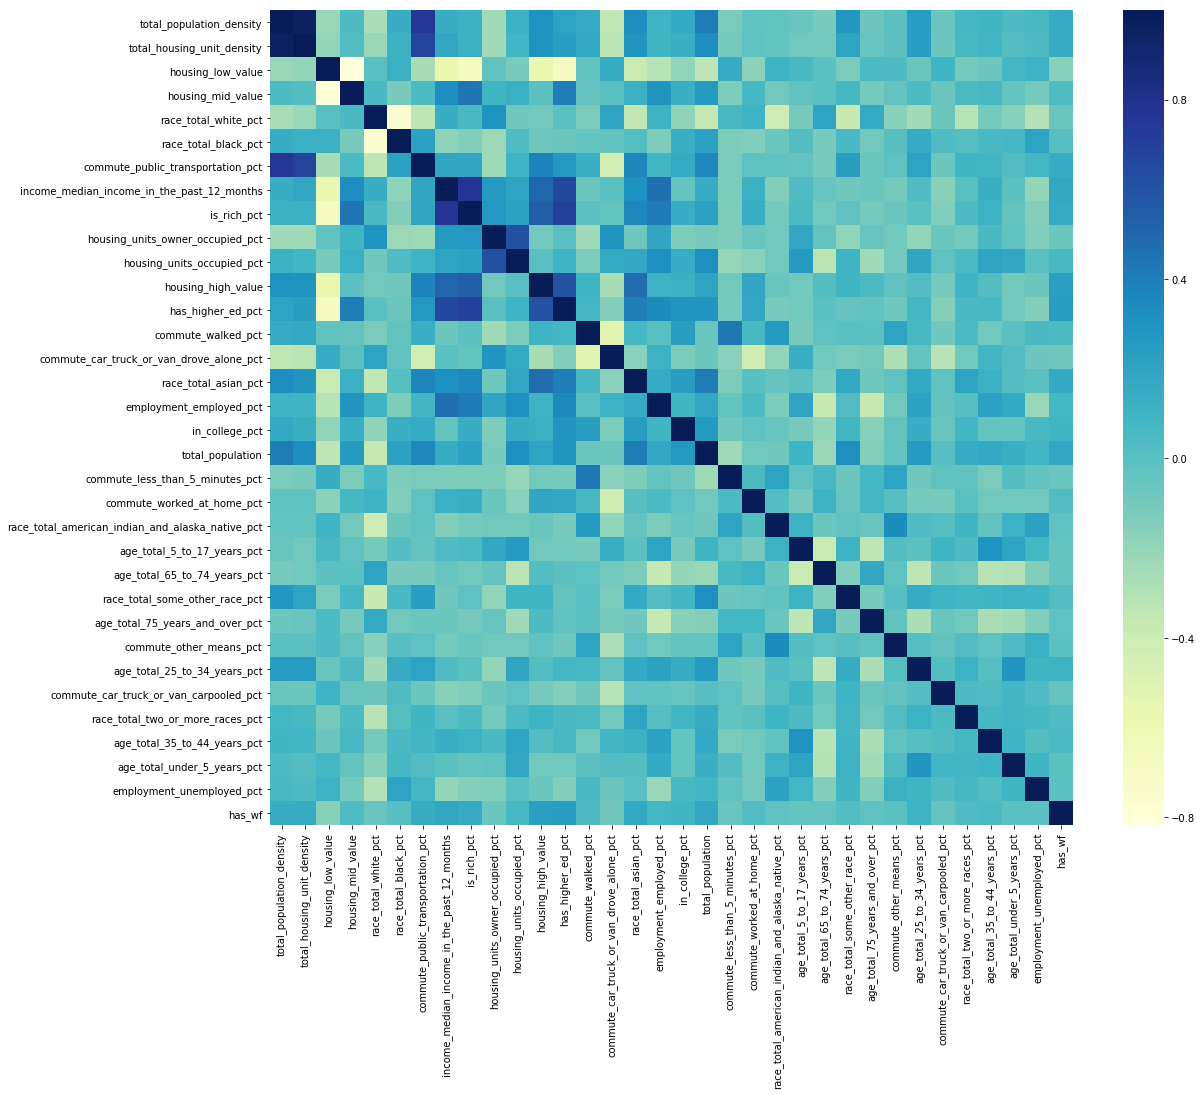

In [109]:
corr22 = new2.corr()
f, ax = plt.subplots(figsize =(18, 15)) 
heatmap = sns.heatmap(corr22, cmap = 'YlGnBu')
fig = heatmap.get_figure()
fig.savefig('corr2.png')

In [110]:
raw.columns.tolist()

['age_median_age',
 'zip',
 'housing_units_total',
 'housing_median_monthly_housing_costs',
 'income_households_with_public_assistance_income',
 'income_households_no_public_assistance_income',
 'income_household_income_lowest_quntile_upper_limit',
 'income_household_income_second_quntile_upper_limit',
 'income_household_income_third_quntile_upper_limit',
 'income_household_income_fourth_quntile_upper_limit',
 'income_lower_limit_of_top_5_percent',
 'income_gini_index_of_income_inequality',
 'income_per_capita_income_in_the_past_12_months',
 'income_median_income_in_the_past_12_months',
 'total_population',
 'has_wf',
 'land_area',
 'total_population_male_pct',
 'poverty_ratio_under_.50_pct',
 'poverty_ratio_.50_to_.99_pct',
 'poverty_ratio_1.00_to_1.24_pct',
 'poverty_ratio_1.25_to_1.49_pct',
 'poverty_ratio_1.50_to_1.84_pct',
 'poverty_ratio_1.85_to_1.99_pct',
 'poverty_ratio_2.00_and_over_pct',
 'race_total_white_pct',
 'race_total_black_pct',
 'race_total_american_indian_and_alaska

## Holdout data set

Separating the Illinois data for holdout testing.

In [111]:
illinois_zip = pd.read_csv('illinois_zipcodes.csv')

In [112]:
illinois_zip = illinois_zip.drop(columns = ['Unnamed: 0', 'City', 'County', 'Zip Code Map', 'Unnamed: 5', 'Unnamed: 6'])

In [113]:
illinois_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 1 columns):
Zip Code    1587 non-null int64
dtypes: int64(1)
memory usage: 12.5 KB


In [114]:
il_zip_list = illinois_zip['Zip Code'].tolist()

In [115]:
il_zip_list

[60001,
 60002,
 60004,
 60005,
 60006,
 60007,
 60008,
 60009,
 60010,
 60011,
 60012,
 60013,
 60014,
 60015,
 60016,
 60017,
 60018,
 60019,
 60020,
 60021,
 60022,
 60025,
 60026,
 60029,
 60030,
 60031,
 60033,
 60034,
 60035,
 60037,
 60038,
 60039,
 60040,
 60041,
 60042,
 60043,
 60044,
 60045,
 60046,
 60047,
 60048,
 60049,
 60050,
 60051,
 60053,
 60055,
 60056,
 60060,
 60061,
 60062,
 60064,
 60065,
 60067,
 60068,
 60069,
 60070,
 60071,
 60072,
 60073,
 60074,
 60075,
 60076,
 60077,
 60078,
 60079,
 60081,
 60082,
 60083,
 60084,
 60085,
 60086,
 60087,
 60088,
 60089,
 60090,
 60091,
 60092,
 60093,
 60094,
 60095,
 60096,
 60097,
 60098,
 60099,
 60101,
 60102,
 60103,
 60104,
 60105,
 60106,
 60107,
 60108,
 60109,
 60110,
 60111,
 60112,
 60113,
 60115,
 60116,
 60117,
 60118,
 60119,
 60120,
 60121,
 60122,
 60123,
 60124,
 60125,
 60126,
 60128,
 60129,
 60130,
 60131,
 60132,
 60133,
 60134,
 60135,
 60136,
 60137,
 60138,
 60139,
 60140,
 60141,
 60142,
 60143,


In [116]:
illinois_holdout = eng[eng['zip'].isin(il_zip_list)]

In [117]:
illinois_holdout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 3805 to 6830
Data columns (total 57 columns):
zip                                                          1227 non-null int64
has_wf                                                       1227 non-null int64
total_population_density                                     1227 non-null float64
total_housing_unit_density                                   1227 non-null float64
is_rich_pct                                                  1227 non-null float64
has_higher_ed_pct                                            1227 non-null float64
in_college_pct                                               1227 non-null float64
income_median_income_in_the_past_12_months                   1227 non-null float64
income_gini_index_of_income_inequality                       1227 non-null float64
total_population                                             1227 non-null float64
total_population_male_pct                                    122

In [118]:
eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29351 entries, 0 to 32988
Data columns (total 57 columns):
zip                                                          29351 non-null int64
has_wf                                                       29351 non-null int64
total_population_density                                     29351 non-null float64
total_housing_unit_density                                   29351 non-null float64
is_rich_pct                                                  29351 non-null float64
has_higher_ed_pct                                            29351 non-null float64
in_college_pct                                               29351 non-null float64
income_median_income_in_the_past_12_months                   29351 non-null float64
income_gini_index_of_income_inequality                       29351 non-null float64
total_population                                             29351 non-null float64
total_population_male_pct                              

In [119]:
eng = eng[~eng['zip'].isin(il_zip_list)]

In [120]:
eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28124 entries, 0 to 32988
Data columns (total 57 columns):
zip                                                          28124 non-null int64
has_wf                                                       28124 non-null int64
total_population_density                                     28124 non-null float64
total_housing_unit_density                                   28124 non-null float64
is_rich_pct                                                  28124 non-null float64
has_higher_ed_pct                                            28124 non-null float64
in_college_pct                                               28124 non-null float64
income_median_income_in_the_past_12_months                   28124 non-null float64
income_gini_index_of_income_inequality                       28124 non-null float64
total_population                                             28124 non-null float64
total_population_male_pct                              

### Test models

In [122]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

from sklearn.preprocessing import StandardScaler

def test_models(df, scale_cols=True):
    
    SEED = 0
    
    lr = LogisticRegression(random_state=SEED)
    knn = KNN()
    dt = DecisionTreeClassifier(random_state=SEED)
    nb = GaussianNB()
    svc_lin = SVC(kernel='linear', random_state=SEED)
    svc_rbf = SVC(kernel='rbf', random_state=SEED)
    lin_svc = LinearSVC(random_state=SEED)
    gb = GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=100, random_state=SEED)
    dt_ada = DecisionTreeClassifier(max_depth=2, random_state=SEED)
    ada = AdaBoostClassifier(base_estimator=dt_ada, n_estimators=100, random_state=SEED)

    classifiers = [
        ('Logistic Regression', lr),
        ('K Nearest Neighbours', knn),
        ('Classification Tree', dt),
        ('Gaussian Naive Bayes', nb),
#         ('SVM Linear Kernel', svc_lin),
#         ('SVM RBF', svc_rbf),
        ('Linear SVM', lin_svc),
        ('Gradient Boost', gb),
        ('Random Forest', rf),
        ('AdaBoost', ada)
    ]
    
    y = df['has_wf']
    X = df.loc[:, (df.columns != 'has_wf') & (df.columns != 'zip')]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= SEED)

    for clf_name, clf in classifiers:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print('{:s} \n : (accuracy : {:.3f}), (precision : {:.3f}), (recall : {:.3f}), (balance accuracy : {:.3f})'.format(
            clf_name, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), balanced_accuracy_score(y_test, y_pred)))
        print(confusion_matrix(y_test, y_pred))
        print('---'*50)
        print('\n')
    return lr, nb, X_test, y_test
        

### Establish baseline

We ran tests on the engineered data to have a baseline in order to assess how we were improving on our models.

In [114]:
eng.to_csv('./engineered_features.csv')

In [123]:
lr_b, nb_b, X_test_b, y_test_b = test_models(eng)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression 
 : (accuracy : 0.986), (precision : 0.583), (recall : 0.057), (balance accuracy : 0.528)
[[8311    5]
 [ 115    7]]
------------------------------------------------------------------------------------------------------------------------------------------------------


K Nearest Neighbours 
 : (accuracy : 0.983), (precision : 0.219), (recall : 0.057), (balance accuracy : 0.527)
[[8291   25]
 [ 115    7]]
------------------------------------------------------------------------------------------------------------------------------------------------------


Classification Tree 
 : (accuracy : 0.974), (precision : 0.175), (recall : 0.221), (balance accuracy : 0.603)
[[8189  127]
 [  95   27]]
------------------------------------------------------------------------------------------------------------------------------------------------------


Gaussian Naive Bayes 
 : (accuracy : 0.824), (precision : 0.070), (recall : 0.902), (balance accuracy : 0.862)
[[6845 1471]
 [  1

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Linear SVM 
 : (accuracy : 0.986), (precision : 0.000), (recall : 0.000), (balance accuracy : 0.500)
[[8316    0]
 [ 122    0]]
------------------------------------------------------------------------------------------------------------------------------------------------------


Gradient Boost 
 : (accuracy : 0.984), (precision : 0.418), (recall : 0.189), (balance accuracy : 0.592)
[[8284   32]
 [  99   23]]
------------------------------------------------------------------------------------------------------------------------------------------------------


Random Forest 
 : (accuracy : 0.985), (precision : 0.333), (recall : 0.016), (balance accuracy : 0.508)
[[8312    4]
 [ 120    2]]
------------------------------------------------------------------------------------------------------------------------------------------------------


AdaBoost 
 : (accuracy : 0.981), (precision : 0.222), (recall : 0.131), (balance accuracy : 0.562)
[[8260   56]
 [ 106   16]]
------------------------

As expected, we are getting high accuracy, and low precision and recall.

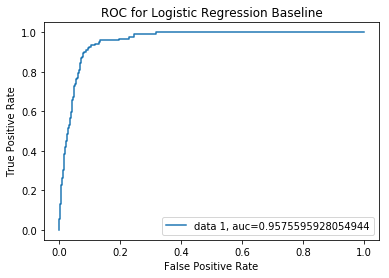

In [124]:
from sklearn import metrics

y_pred_proba_b = lr_b.predict_proba(X_test_b)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_b,  y_pred_proba_b)
auc = metrics.roc_auc_score(y_test_b, y_pred_proba_b)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('ROC for Logistic Regression Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

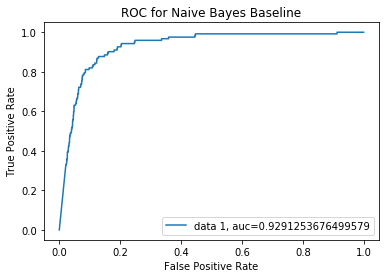

In [125]:
from sklearn import metrics

y_pred_proba_b_nb = nb_b.predict_proba(X_test_b)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_b,  y_pred_proba_b_nb)
auc = metrics.roc_auc_score(y_test_b, y_pred_proba_b_nb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('ROC for Naive Bayes Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


If we naively look at these ROC graphs, we would conclude that our model is performing well, sine there is a small trade off between true positive and false positive rate. With a falso positive rate of 0.2 we would have a true positive rate close to one. However, since we are dealing with an imbalanced data set, this information is inaccuarte.

In [126]:
precision_b_lr, recall_b_lr, thresholds_b_lr = metrics.precision_recall_curve(y_test_b, y_pred_proba_b)
precision_b_nb, recall_b_nb, thresholds_b_nb = metrics.precision_recall_curve(y_test_b, y_pred_proba_b_nb)

The precision-recall curve is a better way to evaluate models targeting imbalanced data

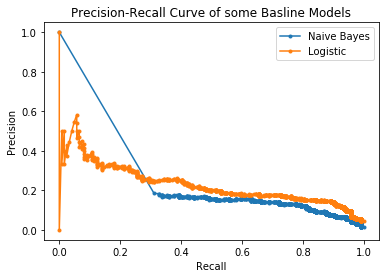

In [127]:
plt.plot(recall_b_nb, precision_b_nb, marker='.', label='Naive Bayes')
plt.plot(recall_b_lr, precision_b_lr, marker='.', label='Logistic')
# axis labels
plt.title('Precision-Recall Curve of some Basline Models')
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [128]:
eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28124 entries, 0 to 32988
Data columns (total 57 columns):
zip                                                          28124 non-null int64
has_wf                                                       28124 non-null int64
total_population_density                                     28124 non-null float64
total_housing_unit_density                                   28124 non-null float64
is_rich_pct                                                  28124 non-null float64
has_higher_ed_pct                                            28124 non-null float64
in_college_pct                                               28124 non-null float64
income_median_income_in_the_past_12_months                   28124 non-null float64
income_gini_index_of_income_inequality                       28124 non-null float64
total_population                                             28124 non-null float64
total_population_male_pct                              

In [117]:
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import StratifiedKFold

# cv error
y = eng['has_wf']
X = eng.loc[:, (eng.columns != 'has_wf') & (eng.columns != 'zip')]

SEED = 0
    
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
nb = GaussianNB()
svc_lin = SVC(kernel='linear', random_state=SEED)
svc_rbf = SVC(kernel='rbf', random_state=SEED)
lin_svc = LinearSVC(random_state=SEED)
gb = GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=SEED)
rf = RandomForestClassifier(n_estimators=100, random_state=SEED)
dt_ada = DecisionTreeClassifier(max_depth=2, random_state=SEED)
ada = AdaBoostClassifier(base_estimator=dt_ada, n_estimators=100, random_state=SEED)

classifiers = [
    ('Logistic Regression', lr),
    ('K Nearest Neighbours', knn),
    ('Classification Tree', dt),
    ('Gaussian Naive Bayes', nb),
#         ('SVM Linear Kernel', svc_lin),
#         ('SVM RBF', svc_rbf),
    ('Linear SVM', lin_svc),
    ('Gradient Boost', gb),
    ('Random Forest', rf),
    ('AdaBoost', ada)
]

# because we have an imbalanced data set we have to be careful how we cross validate

for clf_name, clf in classifiers:
    # Compute the 10-folds CV
    
    overall_confusion_matrix = np.zeros((2,2), int)
    recalls = []
    cv = StratifiedKFold(n_splits=10, random_state=SEED)
    for train_index, test_index in cv.split(X, y):
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index] 
        clf.fit(X_train, y_train)  
        y_pred = clf.predict(X_test)
        overall_confusion_matrix += confusion_matrix(y_test, y_pred)
        recalls.append(recall_score(y_test, y_pred))
    print('{:s} : recalls: {}'.format(clf_name, recalls))
    print(overall_confusion_matrix)

/home/cookd/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

Logistic Regression : recalls: [0.16666666666666666, 0.046511627906976744, 0.0, 0.023255813953488372, 0.09523809523809523, 0.0, 0.023809523809523808, 0.0, 0.0, 0.21428571428571427]
[[27631    70]
 [  399    24]]
K Nearest Neighbours : recalls: [0.14285714285714285, 0.023255813953488372, 0.023255813953488372, 0.06976744186046512, 0.14285714285714285, 0.11904761904761904, 0.14285714285714285, 0.09523809523809523, 0.047619047619047616, 0.16666666666666666]
[[27609    92]
 [  382    41]]
Classification Tree : recalls: [0.3333333333333333, 0.27906976744186046, 0.09302325581395349, 0.23255813953488372, 0.11904761904761904, 0.2619047619047619, 0.21428571428571427, 0.2619047619047619, 0.19047619047619047, 0.3333333333333333]
[[27196   505]
 [  325    98]]
Gaussian Naive Bayes : recalls: [0.9047619047619048, 0.8837209302325582, 0.9767441860465116, 0.9069767441860465, 0.9523809523809523, 0.9523809523809523, 0.8809523809523809, 0.8095238095238095, 0.9761904761904762, 0.9761904761904762]
[[22691  

/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the

Linear SVM : recalls: [0.023809523809523808, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11904761904761904]
[[27679    22]
 [  417     6]]
Gradient Boost : recalls: [0.2857142857142857, 0.11627906976744186, 0.046511627906976744, 0.20930232558139536, 0.11904761904761904, 0.09523809523809523, 0.11904761904761904, 0.14285714285714285, 0.07142857142857142, 0.30952380952380953]
[[27517   184]
 [  359    64]]
Random Forest : recalls: [0.09523809523809523, 0.0, 0.0, 0.0, 0.0, 0.023809523809523808, 0.0, 0.0, 0.0, 0.16666666666666666]
[[27685    16]
 [  411    12]]
AdaBoost : recalls: [0.2857142857142857, 0.11627906976744186, 0.16279069767441862, 0.16279069767441862, 0.11904761904761904, 0.21428571428571427, 0.11904761904761904, 0.19047619047619047, 0.047619047619047616, 0.2857142857142857]
[[27446   255]
 [  351    72]]


## Principle Component Analysis

Decided to reduce dimensionality, increase model efficiency, and reduce the risk of overfitting by running PCA algorithms.

In [129]:
X=eng.drop(columns=['has_wf','zip'], axis =1)

In [130]:
eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28124 entries, 0 to 32988
Data columns (total 57 columns):
zip                                                          28124 non-null int64
has_wf                                                       28124 non-null int64
total_population_density                                     28124 non-null float64
total_housing_unit_density                                   28124 non-null float64
is_rich_pct                                                  28124 non-null float64
has_higher_ed_pct                                            28124 non-null float64
in_college_pct                                               28124 non-null float64
income_median_income_in_the_past_12_months                   28124 non-null float64
income_gini_index_of_income_inequality                       28124 non-null float64
total_population                                             28124 non-null float64
total_population_male_pct                              

In [131]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28124 entries, 0 to 32988
Data columns (total 55 columns):
total_population_density                                     28124 non-null float64
total_housing_unit_density                                   28124 non-null float64
is_rich_pct                                                  28124 non-null float64
has_higher_ed_pct                                            28124 non-null float64
in_college_pct                                               28124 non-null float64
income_median_income_in_the_past_12_months                   28124 non-null float64
income_gini_index_of_income_inequality                       28124 non-null float64
total_population                                             28124 non-null float64
total_population_male_pct                                    28124 non-null float64
race_total_white_pct                                         28124 non-null float64
race_total_black_pct                               

In [132]:
from sklearn.decomposition import PCA

corr=X.corr()



# map features to their absolute correlation values
corr = X.corr().abs()

# set equality (self correlation) as zero
corr[corr == 1] = 0

# of each feature, find the max correlation
# and sort the resulting array in ascending order
corr_cols = corr.max().sort_values(ascending=False)

# display the highly correlated features
display(corr_cols[corr_cols > 0.5])

cols=corr_cols[corr_cols > 0.5]

corr = X.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

indices = np.where(corr > 0.5)
indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices



total_population_density                      0.957825
total_housing_unit_density                    0.957825
housing_mid_value                             0.813503
housing_low_value                             0.813503
is_rich_pct                                   0.770242
income_median_income_in_the_past_12_months    0.770242
commute_public_transportation_pct             0.753683
race_total_white_pct                          0.750360
race_total_black_pct                          0.750360
in_college_pct                                0.734431
age_total_18_to_24_years_pct                  0.734431
has_higher_ed_pct                             0.704432
housing_units_occupied_pct                    0.620248
housing_units_owner_occupied_pct              0.620248
housing_high_value                            0.594974
commute_walked_pct                            0.522541
commute_car_truck_or_van_drove_alone_pct      0.522541
dtype: float64

[('total_population_density', 'total_housing_unit_density'),
 ('total_population_density', 'commute_public_transportation_pct'),
 ('total_housing_unit_density', 'commute_public_transportation_pct'),
 ('is_rich_pct', 'has_higher_ed_pct'),
 ('is_rich_pct', 'income_median_income_in_the_past_12_months'),
 ('is_rich_pct', 'housing_high_value'),
 ('has_higher_ed_pct', 'income_median_income_in_the_past_12_months'),
 ('has_higher_ed_pct', 'housing_high_value'),
 ('in_college_pct', 'age_total_18_to_24_years_pct'),
 ('income_median_income_in_the_past_12_months', 'housing_high_value'),
 ('housing_units_occupied_pct', 'housing_units_owner_occupied_pct')]

In [133]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28124 entries, 0 to 32988
Data columns (total 55 columns):
total_population_density                                     28124 non-null float64
total_housing_unit_density                                   28124 non-null float64
is_rich_pct                                                  28124 non-null float64
has_higher_ed_pct                                            28124 non-null float64
in_college_pct                                               28124 non-null float64
income_median_income_in_the_past_12_months                   28124 non-null float64
income_gini_index_of_income_inequality                       28124 non-null float64
total_population                                             28124 non-null float64
total_population_male_pct                                    28124 non-null float64
race_total_white_pct                                         28124 non-null float64
race_total_black_pct                               

is_rich_pct                                   0.770242
income_median_income_in_the_past_12_months    0.770242
in_college_pct                                0.734431
age_total_18_to_24_years_pct                  0.734431
has_higher_ed_pct                             0.704432
housing_low_value                             0.675036
housing_high_value                            0.594974
commute_car_truck_or_van_drove_alone_pct      0.522541
commute_walked_pct                            0.522541
dtype: float64

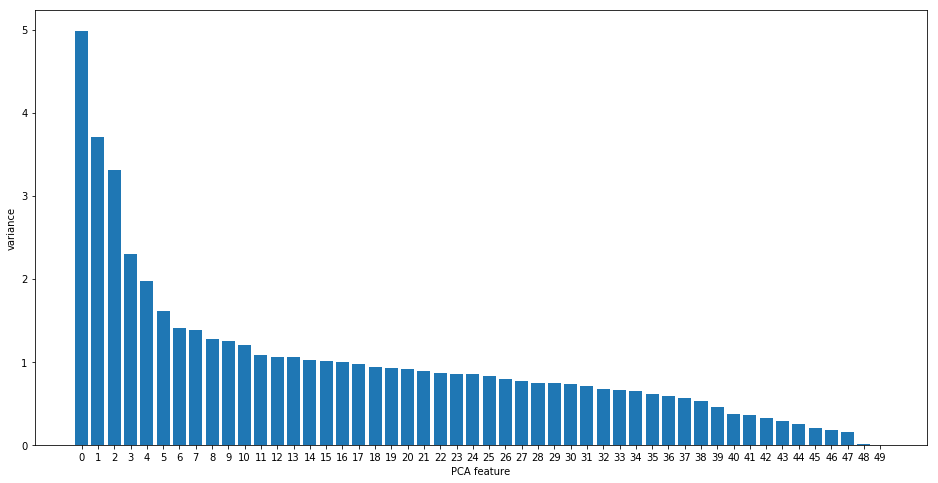

In [134]:
from sklearn.pipeline import make_pipeline

X = X.drop(columns=['total_housing_unit_density', 'commute_public_transportation_pct', 'housing_units_owner_occupied_pct','race_total_black_pct','housing_mid_value','housing_units_owner_occupied_pct'], axis=1)

corr=X.corr()



# map features to their absolute correlation values
corr = X.corr().abs()

# set equality (self correlation) as zero
corr[corr == 1] = 0

# of each feature, find the max correlation
# and sort the resulting array in ascending order
corr_cols = corr.max().sort_values(ascending=False)

# display the highly correlated features
display(corr_cols[corr_cols > 0.5])


# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(X)

# Plot the explained variances
fig = plt.figure(figsize=(16, 8))
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [135]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA

from nose.tools import assert_equal, assert_is_instance, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal
from pandas.util.testing import assert_frame_equal

In [136]:
X.shape

(28124, 50)

In [137]:
def standardize(df):
    '''
    Uses sklearn.preprocessing.StandardScaler to make each features look like
    a Gaussian with zero mean and unit variance.
    
    Parameters
    ----------
    df: A pandas.DataFrame
    
    Returns
    -------
    A numpy array.
    '''
    
    # YOUR CODE HERE
    from sklearn.decomposition import PCA
    from sklearn.pipeline import make_pipeline
    
    stscaler = StandardScaler().fit(df)
    scaled = stscaler.transform(df)
  
    return scaled

def fit_pca(df, n_components):
    '''
    Uses sklearn.decomposition.PCA to fit a PCA model on "df".
    
    Parameters
    ----------
    df: A pandas.DataFrame. Comes from delta.csv.
    n_components: An int. Number of principal components to keep.
    
    Returns
    -------
    An sklearn.decomposition.pca.PCA instance.
    '''
    
    # YOUR CODE HERE
    from sklearn.decomposition import PCA
    from sklearn.pipeline import make_pipeline
  
    pca = PCA(n_components=n_components)
    pipeline = make_pipeline(pca)
    pipeline.fit(df)
    
    
    
    return pca

## Features that most contribute to each component:

In [139]:
#Pick the number of components which explain 85% or greater of the variation
n_components = 47
scaled = standardize(X)
pca = fit_pca(scaled, n_components=n_components)

variance = pca.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

initial_feature_names = list(X.columns.values.tolist()) 
initial_feature_names

model = PCA(n_components=47).fit(X)
X_pc = model.transform(X)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

#initial_feature_names = list(df.columns) 
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]



# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df_imp_columns = pd.DataFrame.from_dict(dic, orient = 'index')

df_imp_columns



,0
PC0,total_population
PC1,income_median_income_in_the_past_12_months
PC2,total_population
PC3,housing_low_value
PC4,race_total_white_pct
PC5,housing_units_occupied_pct
PC6,commute_car_truck_or_van_drove_alone_pct
PC7,housing_high_value
PC8,housing_high_value
PC9,employment_employed_pct


In [144]:
X_pc.shape

(28124, 47)

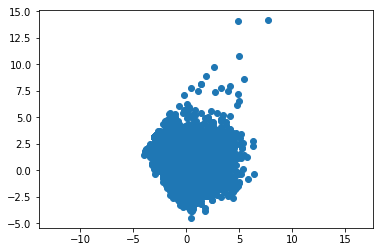

In [140]:
# Import PCA
from sklearn.decomposition import PCA
from scipy.stats import pearsonr


# Assign 0th column of pca_features: xs
xs = X_pc[:,0]

# Assign 1st column of pca_features: ys
ys = X_pc[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)



In [141]:
# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA()

# Fit model to the data
pca.fit(X)

# We can print out rotation matrix and variance associated with each
# projected dimension

vars = pca.explained_variance_ratio_

c_names = ['total_population',
 'income_median_income_in_the_past_12_months',
 'total_population',
 'housing_low_value',
 'race_total_white_pct',
 'race_total_white_pct',
 'housing_high_value',
 'commute_car_truck_or_van_drove_alone_pct',
 'employment_employed_pct',
 'race_total_american_indian_and_alaska_native_pct',
 'commute_30_to_34_minutes_pct',
 'commute_20_to_24_minutes_pct',
 'housing_units_occupied_pct',
 'commute_30_to_34_minutes_pct',
 'commute_30_to_34_minutes_pct',
 'commute_car_truck_or_van_carpooled_pct',
 'commute_10_to_14_minutes_pct',
 'commute_worked_at_home_pct',
 'age_total_65_to_74_years_pct',
 'commute_less_than_5_minutes_pct',
 'commute_60_to_89_minutes_pct',
 'total_population_male_pct',
 'age_total_75_years_and_over_pct',
 'age_total_25_to_34_years_pct',
 'commute_25_to_29_minutes_pct',
 'age_total_45_to_54_years_pct',
 'age_total_18_to_24_years_pct',
 'age_total_25_to_34_years_pct',
 'age_total_55_to_59_years_pct',
 'commute_40_to_44_minutes_pct',
 'commute_40_to_44_minutes_pct',
 'commute_90_or_more_minutes_pct',
 'age_total_35_to_44_years_pct',
 'commute_90_or_more_minutes_pct',
 'commute_35_to_39_minutes_pct',
 'age_total_62_to_64_years_pct',
 'race_total_two_or_more_races_pct',
 'commute_other_means_pct',
 'age_total_60_and_61_years_pct',
 'employment_unemployed_pct',
 'age_total_under_5_years_pct',
 'commute_other_means_pct',
 'commute_bicycle_pct',
 'race_total_native_hawaiian_and_other_pacific_islander_pct',
 'commute_motorcycle_pct',
 'commute_taxicab_pct',
 'total_population_density',
 'total_housing_unit_density',
 'race_total_some_other_race_pct',
 'housing_low_value',
 'housing_low_value',
 'commute_taxicab_pct']

print('Variance:  Projected dimension')
print('------------------------------')
for idx, row in enumerate(pca.components_):
    output = '{0:4.1f}%:    '.format(100.0 * vars[idx])
    output += " + ".join("{0:5.2f} * {1:s}".format(val, name) \
                      for val, name in zip(row, c_names))
    print(output)

Variance:  Projected dimension
------------------------------
36.9%:     0.00 * total_population +  0.07 * income_median_income_in_the_past_12_months +  0.08 * total_population +  0.01 * housing_low_value +  0.47 * race_total_white_pct +  0.45 * race_total_white_pct +  0.73 * housing_high_value + -0.01 * commute_car_truck_or_van_drove_alone_pct + -0.05 * employment_employed_pct + -0.01 * race_total_american_indian_and_alaska_native_pct +  0.02 * commute_30_to_34_minutes_pct +  0.00 * commute_20_to_24_minutes_pct +  0.01 * housing_units_occupied_pct +  0.00 * commute_30_to_34_minutes_pct +  0.00 * commute_30_to_34_minutes_pct +  0.01 * commute_car_truck_or_van_carpooled_pct +  0.00 * commute_10_to_14_minutes_pct +  0.01 * commute_worked_at_home_pct +  0.01 * age_total_65_to_74_years_pct + -0.00 * commute_less_than_5_minutes_pct + -0.00 * commute_60_to_89_minutes_pct + -0.00 * total_population_male_pct + -0.00 * age_total_75_years_and_over_pct + -0.01 * age_total_25_to_34_years_pct + -0.

In [142]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

In [143]:
principalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28124 entries, 0 to 28123
Data columns (total 4 columns):
principal component 1    28124 non-null float64
principal component 2    28124 non-null float64
principal component 3    28124 non-null float64
principal component 4    28124 non-null float64
dtypes: float64(4)
memory usage: 879.0 KB


In [145]:
eng = eng.reset_index()

In [146]:
finalDf_pc = principalDf.join(eng[['has_wf']])

In [147]:
finalDf_pc['has_wf'] = finalDf_pc['has_wf'].fillna(1)

In [148]:
finalDf_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28124 entries, 0 to 28123
Data columns (total 5 columns):
principal component 1    28124 non-null float64
principal component 2    28124 non-null float64
principal component 3    28124 non-null float64
principal component 4    28124 non-null float64
has_wf                   28124 non-null int64
dtypes: float64(4), int64(1)
memory usage: 1.1 MB


In [149]:
df_plot_pc = finalDf_pc[['principal component 1', 'principal component 2', 'has_wf']]

## Reducing the dimensions of the data to visualize it

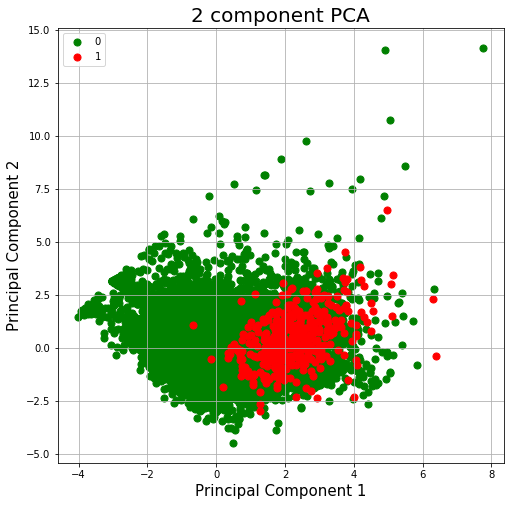

In [150]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = df_plot_pc['has_wf'] == target
    ax.scatter(df_plot_pc.loc[indicesToKeep, 'principal component 1']
               , df_plot_pc.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Running our models with the principal components (Predictive Power vs Efficiency trade-off)

In [151]:
pca_run = test_models(finalDf_pc, scale_cols=True)

Logistic Regression 
 : (accuracy : 0.985), (precision : 0.250), (recall : 0.033), (balance accuracy : 0.516)
[[8304   12]
 [ 118    4]]
------------------------------------------------------------------------------------------------------------------------------------------------------


K Nearest Neighbours 
 : (accuracy : 0.983), (precision : 0.211), (recall : 0.066), (balance accuracy : 0.531)
[[8286   30]
 [ 114    8]]
------------------------------------------------------------------------------------------------------------------------------------------------------


Classification Tree 
 : (accuracy : 0.976), (precision : 0.194), (recall : 0.205), (balance accuracy : 0.596)
[[8212  104]
 [  97   25]]
------------------------------------------------------------------------------------------------------------------------------------------------------


Gaussian Naive Bayes 
 : (accuracy : 0.969), (precision : 0.122), (recall : 0.189), (balance accuracy : 0.584)
[[8151  165]
 [  9

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Linear SVM 
 : (accuracy : 0.986), (precision : 0.000), (recall : 0.000), (balance accuracy : 0.500)
[[8316    0]
 [ 122    0]]
------------------------------------------------------------------------------------------------------------------------------------------------------


Gradient Boost 
 : (accuracy : 0.981), (precision : 0.231), (recall : 0.148), (balance accuracy : 0.570)
[[8256   60]
 [ 104   18]]
------------------------------------------------------------------------------------------------------------------------------------------------------


Random Forest 
 : (accuracy : 0.984), (precision : 0.235), (recall : 0.033), (balance accuracy : 0.516)
[[8303   13]
 [ 118    4]]
------------------------------------------------------------------------------------------------------------------------------------------------------


AdaBoost 
 : (accuracy : 0.982), (precision : 0.230), (recall : 0.115), (balance accuracy : 0.555)
[[8269   47]
 [ 108   14]]
------------------------

In [152]:
eng.head()

,index,zip,has_wf,total_population_density,total_housing_unit_density,is_rich_pct,has_higher_ed_pct,in_college_pct,income_median_income_in_the_past_12_months,income_gini_index_of_income_inequality,total_population,total_population_male_pct,race_total_white_pct,race_total_black_pct,race_total_american_indian_and_alaska_native_pct,race_total_asian_pct,race_total_native_hawaiian_and_other_pacific_islander_pct,race_total_some_other_race_pct,race_total_two_or_more_races_pct,age_total_under_5_years_pct,age_total_5_to_17_years_pct,age_total_18_to_24_years_pct,age_total_25_to_34_years_pct,age_total_35_to_44_years_pct,age_total_45_to_54_years_pct,age_total_55_to_59_years_pct,age_total_60_and_61_years_pct,age_total_62_to_64_years_pct,age_total_65_to_74_years_pct,age_total_75_years_and_over_pct,commute_car_truck_or_van_drove_alone_pct,commute_car_truck_or_van_carpooled_pct,commute_public_transportation_pct,commute_taxicab_pct,commute_motorcycle_pct,commute_bicycle_pct,commute_walked_pct,commute_other_means_pct,commute_worked_at_home_pct,commute_less_than_5_minutes_pct,commute_5_to_9_minutes_pct,commute_10_to_14_minutes_pct,commute_15_to_19_minutes_pct,commute_20_to_24_minutes_pct,commute_25_to_29_minutes_pct,commute_30_to_34_minutes_pct,commute_35_to_39_minutes_pct,commute_40_to_44_minutes_pct,commute_45_to_59_minutes_pct,commute_60_to_89_minutes_pct,commute_90_or_more_minutes_pct,employment_employed_pct,employment_unemployed_pct,housing_units_occupied_pct,housing_units_owner_occupied_pct,housing_high_value,housing_mid_value,housing_low_value
0,0,84306,0,7.539463e-06,2.884664e-06,0.386364,0.259804,0.000000,2.237539,-1.263292,-0.662642,0.556522,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.028986,0.223188,0.156522,0.188406,0.159420,0.000000,0.043478,0.000000,0.000000,0.130435,0.069565,0.857895,0.142105,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.373684,0.000000,0.089474,0.000000,0.215789,0.163158,0.110526,0.000000,0.000000,0.047368,0.0,0.000000,0.736434,0.000000,1.000000,0.590909,0.000000,1.000000,0.000000
1,1,84775,0,3.232834e-07,2.718345e-07,0.106952,0.448980,0.032500,-1.247216,0.394945,-0.657423,0.446556,0.995249,0.0,0.000000,0.000000,0.0,0.0,0.004751,0.059382,0.087886,0.038005,0.052257,0.042755,0.142518,0.087886,0.014252,0.168646,0.194774,0.111639,0.738095,0.148810,0.000000,0.0,0.0,0.0,0.101190,0.0,0.011905,0.172619,0.315476,0.339286,0.125000,0.023810,0.000000,0.000000,0.000000,0.000000,0.011905,0.0,0.000000,0.450402,0.008043,0.528249,0.480226,0.047059,0.635294,0.317647
2,4,84781,0,1.204975e-06,2.646642e-06,0.297297,0.698413,0.182266,-0.211238,-0.349990,-0.670953,0.687500,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.191964,0.169643,0.075893,0.191964,0.000000,0.169643,0.000000,0.040179,0.000000,0.129464,0.031250,0.722222,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.277778,0.000000,0.208333,0.097222,0.180556,0.000000,0.000000,0.000000,0.236111,0.000000,0.000000,0.0,0.000000,0.452830,0.100629,0.150407,0.109756,0.000000,0.870370,0.129630
3,6,84513,0,5.639808e-05,2.223090e-05,0.173664,0.141414,0.003157,-0.470705,-0.442047,-0.573085,0.484536,0.992116,0.0,0.007277,0.000606,0.0,0.0,0.000000,0.088539,0.283202,0.027896,0.136446,0.137053,0.087932,0.054579,0.036386,0.043056,0.070952,0.033960,0.839655,0.043103,0.010345,0.0,0.0,0.0,0.017241,0.0,0.089655,0.175862,0.206897,0.079310,0.084483,0.032759,0.015517,0.117241,0.056897,0.051724,0.084483,0.0,0.005172,0.543379,0.030137,0.806154,0.656923,0.000000,0.236534,0.763466
4,7,84516,0,3.274115e-06,1.480755e-06,0.291667,0.112676,0.000000,0.204765,-0.563175,-0.672670,0.507538,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.115578,0.160804,0.010050,0.201005,0.080402,0.030151,0.055276,0.010050,0.100503,0.190955,0.045226,0.816327,0.000000,0.000000,0.0,0.0,0.0,0.010204,0.0,0.173469,0.091837,0.142857,0.173469,0.122449,0.132653,0.020408,0.102041,0.000000,0.040816,0.000000,0.0,0.000000,0.680556,0.000000,0.800000,0.744444,0.000000,0.552239,0.447761


In [155]:
def plot_data(X, y):
    plt.scatter(X[y == 0, 4], X[y == 0, 53], label="No Whole Foods", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 4], X[y == 1, 53], label="Whole Foods", alpha=0.5, linewidth=0.15, c='y')
    plt.ylabel('High Housing Value Pct')
    plt.ylabel('Has Higher Ed. Pct')
    plt.legend()
    return plt.show()

## Training our models with the over-sampled data:

Tried oversampling the data using SMOTE and ADASys, this helped reduce the imbalance in the data.

In [156]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.preprocessing import StandardScaler

def test_models_smote(df, scale_cols=True):
    
    SEED = 0
    
    lr = LogisticRegression(random_state=SEED)
#     knn = KNN()
    dt = DecisionTreeClassifier(random_state=SEED)
    nb = GaussianNB()
    svc_lin = SVC(kernel='linear', random_state=SEED)
    svc_rbf = SVC(kernel='rbf', random_state=SEED)
    lin_svc = LinearSVC(random_state=SEED)
    gb = GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=100, random_state=SEED)
    dt_ada = DecisionTreeClassifier(max_depth=2, random_state=SEED)
    ada = AdaBoostClassifier(base_estimator=dt_ada, n_estimators=100, random_state=SEED)

    classifiers = [
        ('Logistic Regression', lr),
#         ('K Nearest Neighbours', knn),
        ('Classification Tree', dt),
        ('Gaussian Naive Bayes', nb),
#         ('SVM Linear Kernel', svc_lin),
#         ('SVM RBF', svc_rbf),
        ('Linear SVM', lin_svc),
        ('Gradient Boost', gb),
        ('Random Forest', rf),
#         ('AdaBoost', ada)
    ]
    
    y = df['has_wf']
    X = df.loc[:, (df.columns != 'has_wf') & (df.columns != 'zip')]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= SEED)
    # Define the resampling method
    method = SMOTE(0.4)

# Create the resampled feature set
    X_resampled_smote, y_resampled_smote = method.fit_sample(X_train, y_train)
    

    for clf_name, clf in classifiers:
        clf.fit(X_resampled_smote, y_resampled_smote)
        y_pred = clf.predict(X_test)
        print('{:s} : (accuracy : {:.3f}), (rmse : {:.3f}), (recall : {:.3f}), (balance accuracy : {:.3f})'.format(
            clf_name, accuracy_score(y_test, y_pred), np.sqrt(MSE(y_test, y_pred)), recall_score(y_test, y_pred), balanced_accuracy_score(y_test, y_pred)))
        print(confusion_matrix(y_test, y_pred))
    return X_resampled_smote, y_resampled_smote     

In [157]:
X_resampled_smote, y_resampled_smote = test_models_smote(eng, scale_cols=True)

Logistic Regression : (accuracy : 0.925), (rmse : 0.275), (recall : 0.631), (balance accuracy : 0.780)
[[7724  592]
 [  45   77]]
Classification Tree : (accuracy : 0.964), (rmse : 0.190), (recall : 0.385), (balance accuracy : 0.679)
[[8086  230]
 [  75   47]]
Gaussian Naive Bayes : (accuracy : 0.871), (rmse : 0.359), (recall : 0.893), (balance accuracy : 0.882)
[[7243 1073]
 [  13  109]]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM : (accuracy : 0.983), (rmse : 0.131), (recall : 0.057), (balance accuracy : 0.527)
[[8287   29]
 [ 115    7]]
Gradient Boost : (accuracy : 0.971), (rmse : 0.169), (recall : 0.402), (balance accuracy : 0.691)
[[8148  168]
 [  73   49]]
Random Forest : (accuracy : 0.974), (rmse : 0.160), (recall : 0.320), (balance accuracy : 0.652)
[[8183  133]
 [  83   39]]


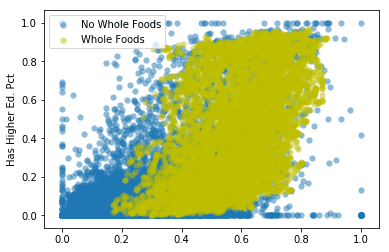

In [158]:
plot_smote = plot_data(X_resampled_smote, y_resampled_smote)

In [159]:
def test_models_ada(df, scale_cols=True):
    
    SEED = 0
    
    lr = LogisticRegression(random_state=SEED)
    knn = KNN()
    dt = DecisionTreeClassifier(random_state=SEED)
    nb = GaussianNB()
    svc_lin = SVC(kernel='linear', random_state=SEED)
    svc_rbf = SVC(kernel='rbf', random_state=SEED)
    lin_svc = LinearSVC(random_state=SEED)
    gb = GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=100, random_state=SEED)
    dt_ada = DecisionTreeClassifier(max_depth=2, random_state=SEED)
#     ada = AdaBoostClassifier(base_estimator=dt_ada, n_estimators=100, random_state=SEED)

    classifiers = [
        ('Logistic Regression', lr),
        ('K Nearest Neighbours', knn),
        ('Classification Tree', dt),
        ('Gaussian Naive Bayes', nb),
#         ('SVM Linear Kernel', svc_lin),
#         ('SVM RBF', svc_rbf),
        ('Linear SVM', lin_svc),
        ('Gradient Boost', gb),
        ('Random Forest', rf),
#         ('AdaBoost', ada)
    ]
    
    y = df['has_wf']
    X = df.loc[:, (df.columns != 'has_wf') & (df.columns != 'zip')]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= SEED)
    # Define the resampling method
    method2 = ADASYN(0.3)
    X_resampled_ada, y_resampled_ada = method2.fit_sample(X_train, y_train)
    

    for clf_name, clf in classifiers:
        clf.fit(X_resampled_ada, y_resampled_ada)
        y_pred = clf.predict(X_test)
        print('{:s} : (accuracy : {:.3f}), (rmse : {:.3f}), (recall : {:.3f}), (balance accuracy : {:.3f})'.format(
            clf_name, accuracy_score(y_test, y_pred), np.sqrt(MSE(y_test, y_pred)), recall_score(y_test, y_pred), balanced_accuracy_score(y_test, y_pred)))
        print(confusion_matrix(y_test, y_pred))
    return X_resampled_ada, y_resampled_ada

In [160]:
X_resampled_ada, y_resampled_ada = test_models_ada(eng, scale_cols=True)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression : (accuracy : 0.937), (rmse : 0.251), (recall : 0.648), (balance accuracy : 0.794)
[[7828  488]
 [  43   79]]
K Nearest Neighbours : (accuracy : 0.915), (rmse : 0.292), (recall : 0.262), (balance accuracy : 0.593)
[[7686  630]
 [  90   32]]
Classification Tree : (accuracy : 0.965), (rmse : 0.187), (recall : 0.402), (balance accuracy : 0.687)
[[8093  223]
 [  73   49]]
Gaussian Naive Bayes : (accuracy : 0.880), (rmse : 0.347), (recall : 0.885), (balance accuracy : 0.882)
[[7316 1000]
 [  14  108]]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM : (accuracy : 0.550), (rmse : 0.670), (recall : 0.730), (balance accuracy : 0.639)
[[4556 3760]
 [  33   89]]
Gradient Boost : (accuracy : 0.975), (rmse : 0.159), (recall : 0.402), (balance accuracy : 0.692)
[[8177  139]
 [  73   49]]
Random Forest : (accuracy : 0.977), (rmse : 0.152), (recall : 0.336), (balance accuracy : 0.661)
[[8202  114]
 [  81   41]]


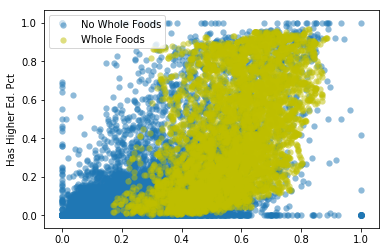

In [161]:
plot_ada = plot_data(X_resampled_ada, y_resampled_ada)

In [152]:
X_resampled_ada, y_resampled_ada = test_models_ada(finalDf_pc, scale_cols=True)

Logistic Regression : (accuracy : 0.927), (rmse : 0.270), (recall : 0.680), (balance accuracy : 0.806)
[[7741  575]
 [  39   83]]
K Nearest Neighbours : (accuracy : 0.939), (rmse : 0.247), (recall : 0.451), (balance accuracy : 0.699)
[[7870  446]
 [  67   55]]
Classification Tree : (accuracy : 0.951), (rmse : 0.222), (recall : 0.336), (balance accuracy : 0.648)
[[7982  334]
 [  81   41]]
Gaussian Naive Bayes : (accuracy : 0.904), (rmse : 0.310), (recall : 0.648), (balance accuracy : 0.778)
[[7550  766]
 [  43   79]]


/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM : (accuracy : 0.926), (rmse : 0.272), (recall : 0.697), (balance accuracy : 0.813)
[[7727  589]
 [  37   85]]
Gradient Boost : (accuracy : 0.952), (rmse : 0.218), (recall : 0.484), (balance accuracy : 0.721)
[[7978  338]
 [  63   59]]
Random Forest : (accuracy : 0.959), (rmse : 0.202), (recall : 0.402), (balance accuracy : 0.685)
[[8046  270]
 [  73   49]]


In [162]:
from imblearn.under_sampling import NearMiss

## Trying undersampling performance

Tried undersampling using NearMiss to see if that helped our models. This is another way of creating a much smaller, but more balanced dataset.

In [163]:
def test_models_nm(df, scale_cols=True):
    
    SEED = 0
    
    lr = LogisticRegression(random_state=SEED)
    knn = KNN()
    dt = DecisionTreeClassifier(random_state=SEED)
    nb = GaussianNB()
    svc_lin = SVC(kernel='linear', random_state=SEED)
    svc_rbf = SVC(kernel='rbf', random_state=SEED)
    lin_svc = LinearSVC(random_state=SEED)
    gb = GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=100, random_state=SEED)
    dt_ada = DecisionTreeClassifier(max_depth=2, random_state=SEED)
    ada = AdaBoostClassifier(base_estimator=dt_ada, n_estimators=100, random_state=SEED)

    classifiers = [
        ('Logistic Regression', lr),
        ('K Nearest Neighbours', knn),
        ('Classification Tree', dt),
        ('Gaussian Naive Bayes', nb),
#         ('SVM Linear Kernel', svc_lin),
#         ('SVM RBF', svc_rbf),
        ('Linear SVM', lin_svc),
        ('Gradient Boost', gb),
        ('Random Forest', rf),
#         ('AdaBoost', ada)
    ]
    
    y = df['has_wf']
    X = df.loc[:, (df.columns != 'has_wf') & (df.columns != 'zip')]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= SEED)
    # Define the resampling method
    method3 = NearMiss()
    
    
    X_train, y_train = method3.fit_sample(X_train, y_train)
    X_resampled_nm, y_resampled_nm = method3.fit_sample(X_train, y_train)
    
    

    for clf_name, clf in classifiers:
        clf.fit(X_resampled_nm, y_resampled_nm)
        y_pred = clf.predict(X_test)
        print('{:s} : (accuracy : {:.3f}), (rmse : {:.3f}), (recall : {:.3f}), (balance accuracy : {:.3f})'.format(
            clf_name, accuracy_score(y_test, y_pred), np.sqrt(MSE(y_test, y_pred)), recall_score(y_test, y_pred), balanced_accuracy_score(y_test, y_pred)))
        print(confusion_matrix(y_test, y_pred))
    return X_resampled_nm, y_resampled_nm

In [164]:
X_resampled_nm, y_resampled_nm = test_models_nm(eng, scale_cols=True)

Logistic Regression : (accuracy : 0.902), (rmse : 0.314), (recall : 0.664), (balance accuracy : 0.784)
[[7526  790]
 [  41   81]]
K Nearest Neighbours : (accuracy : 0.160), (rmse : 0.916), (recall : 0.697), (balance accuracy : 0.425)
[[1269 7047]
 [  37   85]]
Classification Tree : (accuracy : 0.865), (rmse : 0.367), (recall : 0.836), (balance accuracy : 0.851)
[[7199 1117]
 [  20  102]]
Gaussian Naive Bayes : (accuracy : 0.883), (rmse : 0.342), (recall : 0.893), (balance accuracy : 0.888)
[[7340  976]
 [  13  109]]
Linear SVM : (accuracy : 0.977), (rmse : 0.152), (recall : 0.066), (balance accuracy : 0.528)
[[8234   82]
 [ 114    8]]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Gradient Boost : (accuracy : 0.879), (rmse : 0.349), (recall : 0.869), (balance accuracy : 0.874)
[[7307 1009]
 [  16  106]]
Random Forest : (accuracy : 0.914), (rmse : 0.294), (recall : 0.893), (balance accuracy : 0.904)
[[7601  715]
 [  13  109]]


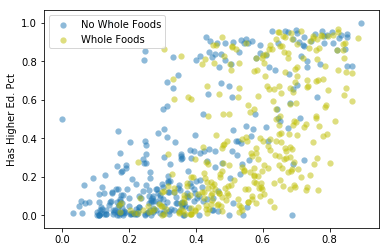

In [168]:
plot_nm = plot_data(X_resampled_nm, y_resampled_nm)

In [166]:
y_resampled_nm.shape

(602,)

In [167]:
X_resampled_nm.shape

(602, 56)

In [169]:
import numpy as np
unique_elements, counts_elements = np.unique(y_resampled_nm, return_counts=True)


In [170]:
print("Frequency of unique values of Near Miss Sampling:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of Near Miss Sampling:
[[  0   1]
 [301 301]]


In [161]:
X_resampled_nm, y_resampled_nm = test_models_nm(finalDf_pc, scale_cols=True)

Logistic Regression : (accuracy : 0.944), (rmse : 0.236), (recall : 0.598), (balance accuracy : 0.774)
[[7894  422]
 [  49   73]]
K Nearest Neighbours : (accuracy : 0.477), (rmse : 0.723), (recall : 0.607), (balance accuracy : 0.541)
[[3953 4363]
 [  48   74]]
Classification Tree : (accuracy : 0.166), (rmse : 0.913), (recall : 0.689), (balance accuracy : 0.424)
[[1320 6996]
 [  38   84]]
Gaussian Naive Bayes : (accuracy : 0.142), (rmse : 0.927), (recall : 0.574), (balance accuracy : 0.354)
[[1124 7192]
 [  52   70]]
Linear SVM : (accuracy : 0.943), (rmse : 0.238), (recall : 0.598), (balance accuracy : 0.773)
[[7888  428]
 [  49   73]]
Gradient Boost : (accuracy : 0.336), (rmse : 0.815), (recall : 0.631), (balance accuracy : 0.481)
[[2756 5560]
 [  45   77]]
Random Forest : (accuracy : 0.273), (rmse : 0.853), (recall : 0.672), (balance accuracy : 0.469)
[[2218 6098]
 [  40   82]]


## Cross Validation and Model Comparision. Tuning and grid-search.

In [163]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, f1_score
from imblearn.over_sampling import SMOTE

def cross_validate_smote(X, y, classifiers, SEED, sampling_strategy=.4):

    confusion_matrix_dict = {}

    for clf_name, clf in classifiers:
        # Compute the 10-folds CV
        print("working on {}".format(clf_name))
        overall_confusion_matrix = np.zeros((2,2), int)
        recalls = []
        cv = StratifiedKFold(n_splits=10, random_state=SEED)
        for train_index, test_index in cv.split(X, y):
            X_train = X.iloc[train_index]
            y_train = y.iloc[train_index]
            X_test = X.iloc[test_index]
            y_test = y.iloc[test_index] 
            sm = SMOTE(sampling_strategy)
            X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
            clf.fit(X_train_oversampled, y_train_oversampled )  
            y_pred = clf.predict(X_test)
            overall_confusion_matrix += confusion_matrix(y_test, y_pred)
            recalls.append(recall_score(y_test, y_pred))
        print('{:s} : recalls: {}'.format(clf_name, recalls))
        print(overall_confusion_matrix)
        print('-'*50)
        print('\n')
        confusion_matrix_dict[clf_name] = overall_confusion_matrix

    return confusion_matrix_dict

In [164]:
# cv error
y = eng['has_wf']
X = eng.loc[:, (eng.columns != 'has_wf') & (eng.columns != 'zip')]

SEED = 0
    
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
nb = GaussianNB()
svc_lin = SVC(kernel='linear', random_state=SEED)
svc_rbf = SVC(kernel='rbf', random_state=SEED)
lin_svc = LinearSVC(random_state=SEED)
gb = GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=SEED)
rf = RandomForestClassifier(n_estimators=100, random_state=SEED)
dt_ada = DecisionTreeClassifier(max_depth=2, random_state=SEED)
ada = AdaBoostClassifier(base_estimator=dt_ada, n_estimators=100, random_state=SEED)

classifiers = [
    ('Logistic Regression', lr),
    ('K Nearest Neighbours', knn),
    ('Classification Tree', dt),
    ('Gaussian Naive Bayes', nb),
    ('Linear SVM', lin_svc),
    ('Gradient Boost', gb),
    ('Random Forest', rf),
#     ('AdaBoost', ada)
]

d = cross_validate_smote(X, y, classifiers, SEED)

working on Logistic Regression
Logistic Regression : recalls: [0.8571428571428571, 0.7209302325581395, 0.7209302325581395, 0.6976744186046512, 0.8809523809523809, 0.7380952380952381, 0.6428571428571429, 0.6666666666666666, 0.7857142857142857, 0.5714285714285714]
[[25651  2050]
 [  115   308]]
--------------------------------------------------


working on K Nearest Neighbours
K Nearest Neighbours : recalls: [1.0, 0.0, 0.0, 0.5348837209302325, 0.2857142857142857, 0.14285714285714285, 0.21428571428571427, 0.4523809523809524, 0.2857142857142857, 1.0]
[[ 8037 19664]
 [  258   165]]
--------------------------------------------------


working on Classification Tree
Classification Tree : recalls: [0.5714285714285714, 0.27906976744186046, 0.3023255813953488, 0.37209302325581395, 0.5, 0.5, 0.40476190476190477, 0.35714285714285715, 0.35714285714285715, 0.35714285714285715]
[[24824  2877]
 [  254   169]]
--------------------------------------------------


working on Gaussian Naive Bayes
Gaussia

/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the

Linear SVM : recalls: [1.0, 0.4883720930232558, 0.7441860465116279, 0.7674418604651163, 0.2857142857142857, 1.0, 0.47619047619047616, 1.0, 0.8571428571428571, 1.0]
[[21029  6672]
 [  101   322]]
--------------------------------------------------


working on Gradient Boost


KeyboardInterrupt: 

In [165]:
# now test on pca

# cv error
y = finalDf_pc['has_wf']
X = finalDf_pc.loc[:, (finalDf_pc.columns != 'has_wf') & (finalDf_pc.columns != 'zip')]

SEED = 0
    
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
nb = GaussianNB()
svc_lin = SVC(kernel='linear', random_state=SEED)
svc_rbf = SVC(kernel='rbf', random_state=SEED)
lin_svc = LinearSVC(random_state=SEED)
gb = GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=SEED)
rf = RandomForestClassifier(n_estimators=100, random_state=SEED)
dt_ada = DecisionTreeClassifier(max_depth=2, random_state=SEED)
ada = AdaBoostClassifier(base_estimator=dt_ada, n_estimators=100, random_state=SEED)

classifiers = [
    ('Logistic Regression', lr),
    ('K Nearest Neighbours', knn),
    ('Classification Tree', dt),
    ('Gaussian Naive Bayes', nb),
    ('SVM Linear Kernel', svc_lin),
    ('SVM RBF', svc_rbf),
    ('Linear SVM', lin_svc),
    ('Gradient Boost', gb),
    ('Random Forest', rf),
#     ('AdaBoost', ada)
]

d_pca = cross_validate_smote(X, y, classifiers, SEED)

working on Logistic Regression
Logistic Regression : recalls: [0.8571428571428571, 0.7906976744186046, 0.813953488372093, 0.8604651162790697, 0.7380952380952381, 0.7619047619047619, 0.8095238095238095, 0.5238095238095238, 0.7619047619047619, 0.8333333333333334]
[[25409  2292]
 [   95   328]]
--------------------------------------------------


working on K Nearest Neighbours
K Nearest Neighbours : recalls: [0.6190476190476191, 0.37209302325581395, 0.46511627906976744, 0.5348837209302325, 0.5, 0.7619047619047619, 0.5, 0.4523809523809524, 0.5714285714285714, 0.5714285714285714]
[[26174  1527]
 [  197   226]]
--------------------------------------------------


working on Classification Tree
Classification Tree : recalls: [0.40476190476190477, 0.3023255813953488, 0.2558139534883721, 0.32558139534883723, 0.4523809523809524, 0.4523809523809524, 0.38095238095238093, 0.3333333333333333, 0.40476190476190477, 0.5476190476190477]
[[26612  1089]
 [  260   163]]
-----------------------------------

/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the

Linear SVM : recalls: [0.8571428571428571, 0.7906976744186046, 0.8604651162790697, 0.8604651162790697, 0.7619047619047619, 0.7619047619047619, 0.8095238095238095, 0.6190476190476191, 0.8095238095238095, 0.8333333333333334]
[[25321  2380]
 [   86   337]]
--------------------------------------------------


working on Gradient Boost
Gradient Boost : recalls: [0.6190476190476191, 0.5116279069767442, 0.5116279069767442, 0.627906976744186, 0.5952380952380952, 0.6428571428571429, 0.5714285714285714, 0.47619047619047616, 0.5476190476190477, 0.5476190476190477]
[[26528  1173]
 [  184   239]]
--------------------------------------------------


working on Random Forest
Random Forest : recalls: [0.5714285714285714, 0.3953488372093023, 0.3953488372093023, 0.46511627906976744, 0.5476190476190477, 0.5952380952380952, 0.47619047619047616, 0.42857142857142855, 0.42857142857142855, 0.5952380952380952]
[[26722   979]
 [  216   207]]
--------------------------------------------------




In [172]:
# tune

from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as imbpipe

def imb_pipeline(clf, X, y, params):

    model = imbpipe([
        ('sampling', SMOTE()),
        ('clf', clf)
    ])

    score={'AUC':'roc_auc', 
           'RECALL':'recall',
           'PRECISION':'precision',
           'F1':'f1'}

    gcv = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring=score, n_jobs=-1, refit='RECALL',
                       return_train_score=True)
    gcv.fit(X, y)

    return gcv

In [173]:
lr = LogisticRegression(random_state=SEED)
nb = GaussianNB()
lin_svc = LinearSVC(random_state=SEED)

classifiers = [
    ('Logistic Regression', lr),
    ('Gaussian Naive Bayes', nb),
    ('Linear SVM', lin_svc),
]

params = [
    {'sampling__sampling_strategy': [.25,.5,.75,.9], 'clf__penalty': ['l1','l2'], 'clf__max_iter':[100,500,1000]},
    {'sampling__sampling_strategy': [.25,.5,.75,.9], 'clf__var_smoothing':[1e-12,12e-9,1e-6]},
    {'sampling__sampling_strategy': [.25,.5,.75,.9], 'clf__penalty': ['l1','l2'], 'clf__loss': ['hinge', 'squared_hinge']}
]

y = eng['has_wf']
X = eng.loc[:, (eng.columns != 'has_wf') & (eng.columns != 'zip')]

for param, classifier in zip(params, classifiers):
    print("Working on {}...".format(classifier[0]))
    clf = imb_pipeline(classifier[1], X, y, param) 
    print("Best parameter for {} is {}".format(classifier[0], clf.best_params_))
    print("Best `Recall` for {} is {}".format(classifier[0], clf.best_score_))
    print('-'*50)
    print('\n')

Working on Logistic Regression...
Best parameter for Logistic Regression is {'clf__max_iter': 1000, 'clf__penalty': 'l2', 'sampling__sampling_strategy': 0.75}
Best `Recall` for Logistic Regression is 0.8843977591036414
--------------------------------------------------


Working on Gaussian Naive Bayes...
Best parameter for Gaussian Naive Bayes is {'clf__var_smoothing': 1e-12, 'sampling__sampling_strategy': 0.75}
Best `Recall` for Gaussian Naive Bayes is 0.9504761904761905
--------------------------------------------------


Working on Linear SVM...
Best parameter for Linear SVM is {'clf__loss': 'squared_hinge', 'clf__penalty': 'l2', 'sampling__sampling_strategy': 0.9}
Best `Recall` for Linear SVM is 0.9693837535014005
--------------------------------------------------




/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [174]:
# check we don't over fit
lr = LogisticRegression(random_state=SEED, max_iter=500)
# nb = GaussianNB()
# lin_svc = LinearSVC(random_state=SEED, loss='hinge')

classifiers = [
    ('Logistic Regression', lr),
#     ('Gaussian Naive Bayes', nb),
#     ('Linear SVM', lin_svc),
]

y = eng['has_wf']
X = eng.loc[:, (eng.columns != 'has_wf') & (eng.columns != 'zip')]

cross_validate_smote(X, y, classifiers, SEED, sampling_strategy=.9)

working on Logistic Regression
Logistic Regression : recalls: [0.9523809523809523, 1.0, 0.9302325581395349, 0.9302325581395349, 0.8571428571428571, 0.8333333333333334, 0.8809523809523809, 0.7380952380952381, 0.8571428571428571, 0.8809523809523809]
[[23966  3735]
 [   48   375]]
--------------------------------------------------




{'Logistic Regression': array([[23966,  3735],
        [   48,   375]])}

In [175]:
# not great precision, let's scale back
lr = LogisticRegression(random_state=SEED, max_iter=500)
# nb = GaussianNB()
# lin_svc = LinearSVC(random_state=SEED, loss='hinge')

classifiers = [
    ('Logistic Regression', lr),
#     ('Gaussian Naive Bayes', nb),
#     ('Linear SVM', lin_svc),
]

y = eng['has_wf']
X = eng.loc[:, (eng.columns != 'has_wf') & (eng.columns != 'zip')]

cross_validate_smote(X, y, classifiers, SEED, sampling_strategy=.75)

working on Logistic Regression
Logistic Regression : recalls: [0.9523809523809523, 0.8372093023255814, 0.8604651162790697, 0.9767441860465116, 0.9047619047619048, 0.8333333333333334, 0.7857142857142857, 0.6666666666666666, 0.8571428571428571, 0.8809523809523809]
[[24238  3463]
 [   61   362]]
--------------------------------------------------




{'Logistic Regression': array([[24238,  3463],
        [   61,   362]])}

In [176]:
# check we don't over fit
# lr = LogisticRegression(random_state=SEED, max_iter=500)
nb = GaussianNB(var_smoothing=1e-12)
# lin_svc = LinearSVC(random_state=SEED, loss='hinge')

classifiers = [
#     ('Logistic Regression', lr),
    ('Gaussian Naive Bayes', nb),
#     ('Linear SVM', lin_svc),
]

y = eng['has_wf']
X = eng.loc[:, (eng.columns != 'has_wf') & (eng.columns != 'zip')]

cross_validate_smote(X, y, classifiers, SEED, sampling_strategy=.75)

working on Gaussian Naive Bayes
Gaussian Naive Bayes : recalls: [0.9523809523809523, 0.9534883720930233, 0.9767441860465116, 0.9767441860465116, 0.9523809523809523, 0.9761904761904762, 0.9047619047619048, 0.8333333333333334, 1.0, 0.9761904761904762]
[[22005  5696]
 [   21   402]]
--------------------------------------------------




{'Gaussian Naive Bayes': array([[22005,  5696],
        [   21,   402]])}

In [204]:
# check we don't over fit
# lr = LogisticRegression(random_state=SEED, max_iter=500)
nb = GaussianNB(var_smoothing=1e-12)
# lin_svc = LinearSVC(random_state=SEED, loss='hinge')

classifiers = [
#     ('Logistic Regression', lr),
    ('Gaussian Naive Bayes', nb),
#     ('Linear SVM', lin_svc),
]

y = eng['has_wf']
X = eng.loc[:, (eng.columns != 'has_wf') & (eng.columns != 'zip')].drop(columns='index')

cross_validate_smote(X, y, classifiers, SEED, sampling_strategy=.75)

working on Gaussian Naive Bayes
Gaussian Naive Bayes : recalls: [0.8809523809523809, 0.9302325581395349, 0.9534883720930233, 0.9302325581395349, 0.9523809523809523, 0.9285714285714286, 0.9047619047619048, 0.8571428571428571, 1.0, 0.9523809523809523]
[[22245  5456]
 [   30   393]]
--------------------------------------------------




{'Gaussian Naive Bayes': array([[22245,  5456],
        [   30,   393]])}

In [177]:
# precision is getting worse as we oversample more and tune, we must decide how we want to balance this. Overall we want good recall, but we also want to reasonably narrow down the list of possible future locations.
# we prefer a precision of ~10% with good recall
# check we don't over fit
# lr = LogisticRegression(random_state=SEED, max_iter=500)
nb1 = GaussianNB(var_smoothing=1e-12)
nb2 = GaussianNB(var_smoothing=1e-9)
# lin_svc = LinearSVC(random_state=SEED, loss='hinge')

classifiers = [
#     ('Logistic Regression', lr),
    ('Gaussian Naive Bayes 1', nb1),
        ('Gaussian Naive Bayes 2', nb2)
#     ('Linear SVM', lin_svc),
]

y = eng['has_wf']
X = eng.loc[:, (eng.columns != 'has_wf') & (eng.columns != 'zip')]

cross_validate_smote(X, y, classifiers, SEED, sampling_strategy=.75)

working on Gaussian Naive Bayes 1
Gaussian Naive Bayes 1 : recalls: [0.9523809523809523, 0.9534883720930233, 0.9767441860465116, 0.9767441860465116, 0.9523809523809523, 0.9761904761904762, 0.9047619047619048, 0.8333333333333334, 1.0, 0.9761904761904762]
[[21988  5713]
 [   21   402]]
--------------------------------------------------


working on Gaussian Naive Bayes 2
Gaussian Naive Bayes 2 : recalls: [0.9761904761904762, 1.0, 0.9534883720930233, 0.9534883720930233, 0.9523809523809523, 0.9523809523809523, 0.9047619047619048, 0.8333333333333334, 0.9523809523809523, 0.9285714285714286]
[[23307  4394]
 [   25   398]]
--------------------------------------------------




{'Gaussian Naive Bayes 1': array([[21988,  5713],
        [   21,   402]]), 'Gaussian Naive Bayes 2': array([[23307,  4394],
        [   25,   398]])}

In [178]:
# lr = LogisticRegression(random_state=SEED, max_iter=500)
nb1 = GaussianNB(var_smoothing=1e-12)
nb2 = GaussianNB(var_smoothing=1e-9)
# lin_svc = LinearSVC(random_state=SEED, loss='hinge')

classifiers = [
#     ('Logistic Regression', lr),
    ('Gaussian Naive Bayes 1', nb1),
        ('Gaussian Naive Bayes 2', nb2)
#     ('Linear SVM', lin_svc),
]

y = eng['has_wf']
X = eng.loc[:, (eng.columns != 'has_wf') & (eng.columns != 'zip')]

cross_validate_smote(X, y, classifiers, SEED, sampling_strategy=.4)

working on Gaussian Naive Bayes 1
Gaussian Naive Bayes 1 : recalls: [0.9523809523809523, 0.9534883720930233, 0.9767441860465116, 0.9767441860465116, 0.9523809523809523, 0.9523809523809523, 0.9047619047619048, 0.8333333333333334, 1.0, 0.9761904761904762]
[[22145  5556]
 [   22   401]]
--------------------------------------------------


working on Gaussian Naive Bayes 2
Gaussian Naive Bayes 2 : recalls: [0.9761904761904762, 1.0, 0.9534883720930233, 0.9534883720930233, 0.9285714285714286, 0.9285714285714286, 0.8809523809523809, 0.7857142857142857, 0.9047619047619048, 0.9047619047619048]
[[23971  3730]
 [   33   390]]
--------------------------------------------------




{'Gaussian Naive Bayes 1': array([[22145,  5556],
        [   22,   401]]), 'Gaussian Naive Bayes 2': array([[23971,  3730],
        [   33,   390]])}

In [179]:
# check we don't over fit
# lr = LogisticRegression(random_state=SEED, max_iter=500)
# nb = GaussianNB(var_smoothing=1e-12)
lin_svc = LinearSVC(random_state=SEED)

classifiers = [
#     ('Logistic Regression', lr),
#     ('Gaussian Naive Bayes', nb),
    ('Linear SVM', lin_svc),
]

y = eng['has_wf']
X = eng.loc[:, (eng.columns != 'has_wf') & (eng.columns != 'zip')]

cross_validate_smote(X, y, classifiers, SEED, sampling_strategy=.5)
cross_validate_smote(X, y, classifiers, SEED, sampling_strategy=.4)

working on Linear SVM


/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the

Linear SVM : recalls: [1.0, 0.6046511627906976, 0.5813953488372093, 0.8837209302325582, 1.0, 1.0, 1.0, 1.0, 0.8095238095238095, 0.47619047619047616]
[[15044 12657]
 [   70   353]]
--------------------------------------------------


working on Linear SVM


/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the

Linear SVM : recalls: [1.0, 0.4418604651162791, 0.7209302325581395, 0.4186046511627907, 0.09523809523809523, 0.8571428571428571, 0.9047619047619048, 1.0, 0.8571428571428571, 0.9047619047619048]
[[23413  4288]
 [  119   304]]
--------------------------------------------------




/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'Linear SVM': array([[23413,  4288],
        [  119,   304]])}

In [180]:
y = eng['has_wf']
X = eng.loc[:, (eng.columns != 'has_wf') & (eng.columns != 'zip')]

lin_svc = LinearSVC(random_state=SEED)
    
classifiers = [
    ('Linear SVM', lin_svc)
]

cross_validate_smote(X, y, classifiers, SEED)

working on Linear SVM


/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the

Linear SVM : recalls: [1.0, 0.4418604651162791, 0.7209302325581395, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9523809523809523]
[[11765 15936]
 [   38   385]]
--------------------------------------------------




/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'Linear SVM': array([[11765, 15936],
        [   38,   385]])}

In [181]:
y = finalDf_pc['has_wf']
X = finalDf_pc.loc[:, (finalDf_pc.columns != 'has_wf') & (finalDf_pc.columns != 'zip')]

In [182]:
svc_lin = SVC(kernel='linear', random_state=SEED)
svc_rbf = SVC(kernel='rbf', random_state=SEED)

classifiers = [
    ('SVM Linear Kernel', svc_lin),
    ('SVM RBF', svc_rbf)
]

params = [
    {'sampling__sampling_strategy': [.25,.5,.75,.9], 'clf__gamma': ['scale','auto'], 'clf__max_iter':[10000,500000,1000000,-1]},
    {'sampling__sampling_strategy': [.25,.5,.75,.9], 'clf__gamma': ['scale','auto'], 'clf__max_iter':[10000,500000,1000000,-1]}
]

y = finalDf_pc['has_wf']
X = finalDf_pc.loc[:, (finalDf_pc.columns != 'has_wf') & (finalDf_pc.columns != 'zip')]

for param, classifier in zip(params, classifiers):
    print("Working on {}...".format(classifier[0]))
    clf = imb_pipeline(classifier[1], X, y, param) 
    print("Best parameter for {} is {}".format(classifier[0], clf.best_params_))
    print("Best `Recall` for {} is {}".format(classifier[0], clf.best_score_))
    print('-'*50)
    print('\n')

Working on SVM Linear Kernel...


/home/cookd/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Best parameter for SVM Linear Kernel is {'clf__gamma': 'scale', 'clf__max_iter': 10000, 'sampling__sampling_strategy': 0.75}
Best `Recall` for SVM Linear Kernel is 0.9361904761904762
--------------------------------------------------


Working on SVM RBF...
Best parameter for SVM RBF is {'clf__gamma': 'scale', 'clf__max_iter': 1000000, 'sampling__sampling_strategy': 0.9}
Best `Recall` for SVM RBF is 0.9005882352941175
--------------------------------------------------




In [183]:
y = finalDf_pc['has_wf']
X = finalDf_pc.loc[:, (finalDf_pc.columns != 'has_wf') & (finalDf_pc.columns != 'zip')]

svc_lin = SVC(kernel='linear', random_state=SEED)
    
classifiers = [
    ('SVM Linear Kernel', svc_lin)
]

cross_validate_smote(X, y, classifiers, SEED, sampling_strategy=.75)

working on SVM Linear Kernel
SVM Linear Kernel : recalls: [0.9761904761904762, 0.9302325581395349, 0.9534883720930233, 0.9767441860465116, 0.9285714285714286, 0.9523809523809523, 0.9285714285714286, 0.7619047619047619, 0.8809523809523809, 0.8571428571428571]
[[24087  3614]
 [   36   387]]
--------------------------------------------------




{'SVM Linear Kernel': array([[24087,  3614],
        [   36,   387]])}

In [ ]:
# gnb normal smote .4
# lr = LogisticRegression(random_state=SEED, max_iter=500) smote .75
# svc pca linear smote .75
total_population_density                                     28124 non-null float64
total_housing_unit_density                                   28124 non-null float64
is_rich_pct                                                  28124 non-null float64
has_higher_ed_pct                                            28124 non-null float64
in_college_pct                                               28124 non-null float64
income_median_income_in_the_past_12_months                   28124 non-null float64
income_gini_index_of_income_inequality                       28124 non-null float64
total_population                                             28124 non-null float64
total_population_male_pct                                    28124 non-null float64
race_total_white_pct                                         28124 non-null float64
race_total_black_pct                                         28124 non-null float64
race_total_american_indian_and_alaska_native_pct             28124 non-null float64
race_total_asian_pct                                         28124 non-null float64
race_total_native_hawaiian_and_other_pacific_islander_pct    28124 non-null float64
race_total_some_other_race_pct                               28124 non-null float64
race_total_two_or_more_races_pct                             28124 non-null float64
age_total_under_5_years_pct                                  28124 non-null float64
age_total_5_to_17_years_pct                                  28124 non-null float64
age_total_18_to_24_years_pct                                 28124 non-null float64
age_total_25_to_34_years_pct                                 28124 non-null float64
age_total_35_to_44_years_pct                                 28124 non-null float64
age_total_45_to_54_years_pct                                 28124 non-null float64
age_total_55_to_59_years_pct                                 28124 non-null float64
age_total_60_and_61_years_pct                                28124 non-null float64
age_total_62_to_64_years_pct                                 28124 non-null float64
age_total_65_to_74_years_pct                                 28124 non-null float64
age_total_75_years_and_over_pct                              28124 non-null float64
commute_car_truck_or_van_drove_alone_pct                     28124 non-null float64
commute_car_truck_or_van_carpooled_pct                       28124 non-null float64
commute_public_transportation_pct                            28124 non-null float64
commute_taxicab_pct                                          28124 non-null float64
commute_motorcycle_pct                                       28124 non-null float64
commute_bicycle_pct                                          28124 non-null float64
commute_walked_pct                                           28124 non-null float64
commute_other_means_pct                                      28124 non-null float64
commute_worked_at_home_pct                                   28124 non-null float64
commute_less_than_5_minutes_pct                              28124 non-null float64
commute_5_to_9_minutes_pct                                   28124 non-null float64
commute_10_to_14_minutes_pct                                 28124 non-null float64
commute_15_to_19_minutes_pct                                 28124 non-null float64
commute_20_to_24_minutes_pct                                 28124 non-null float64
commute_25_to_29_minutes_pct                                 28124 non-null float64
commute_30_to_34_minutes_pct                                 28124 non-null float64
commute_35_to_39_minutes_pct                                 28124 non-null float64
commute_40_to_44_minutes_pct                                 28124 non-null float64
commute_45_to_59_minutes_pct                                 28124 non-null float64
commute_60_to_89_minutes_pct                                 28124 non-null float64
commute_90_or_more_minutes_pct                               28124 non-null float64
employment_employed_pct                                      28124 non-null float64
employment_unemployed_pct                                    28124 non-null float64
housing_units_occupied_pct                                   28124 non-null float64
housing_units_owner_occupied_pct                             28124 non-null float64
housing_high_value                                           28124 non-null float64
housing_mid_value                                            28124 non-null float64
housing_low_value  

# Final Model Predictions 

In [206]:
illinois_holdout.head()

,zip,has_wf,total_population_density,total_housing_unit_density,is_rich_pct,has_higher_ed_pct,in_college_pct,income_median_income_in_the_past_12_months,income_gini_index_of_income_inequality,total_population,total_population_male_pct,race_total_white_pct,race_total_black_pct,race_total_american_indian_and_alaska_native_pct,race_total_asian_pct,race_total_native_hawaiian_and_other_pacific_islander_pct,race_total_some_other_race_pct,race_total_two_or_more_races_pct,age_total_under_5_years_pct,age_total_5_to_17_years_pct,age_total_18_to_24_years_pct,age_total_25_to_34_years_pct,age_total_35_to_44_years_pct,age_total_45_to_54_years_pct,age_total_55_to_59_years_pct,age_total_60_and_61_years_pct,age_total_62_to_64_years_pct,age_total_65_to_74_years_pct,age_total_75_years_and_over_pct,commute_car_truck_or_van_drove_alone_pct,commute_car_truck_or_van_carpooled_pct,commute_public_transportation_pct,commute_taxicab_pct,commute_motorcycle_pct,commute_bicycle_pct,commute_walked_pct,commute_other_means_pct,commute_worked_at_home_pct,commute_less_than_5_minutes_pct,commute_5_to_9_minutes_pct,commute_10_to_14_minutes_pct,commute_15_to_19_minutes_pct,commute_20_to_24_minutes_pct,commute_25_to_29_minutes_pct,commute_30_to_34_minutes_pct,commute_35_to_39_minutes_pct,commute_40_to_44_minutes_pct,commute_45_to_59_minutes_pct,commute_60_to_89_minutes_pct,commute_90_or_more_minutes_pct,employment_employed_pct,employment_unemployed_pct,housing_units_occupied_pct,housing_units_owner_occupied_pct,housing_high_value,housing_mid_value,housing_low_value
3805,61432,0,0.000006,0.000003,0.167382,0.189696,0.064348,0.676659,0.530607,-0.645541,0.518519,0.981481,0.006734,0.000000,0.0,0.011785,0.000000,0.000000,0.074074,0.141414,0.065657,0.053872,0.164983,0.141414,0.087542,0.050505,0.025253,0.102694,0.092593,0.838174,0.070539,0.0,0.0,0.0,0.024896,0.012448,0.000000,0.053942,0.045643,0.099585,0.012448,0.186722,0.112033,0.037344,0.008299,0.066390,0.095436,0.232365,0.049793,0.000000,0.550000,0.027083,0.844203,0.778986,0.000000,0.074419,0.925581
3806,61378,0,0.000003,0.000001,0.217172,0.096875,0.045685,-0.609041,1.145936,-0.659002,0.479899,0.967337,0.000000,0.000000,0.0,0.000000,0.000000,0.032663,0.010050,0.128141,0.057789,0.015075,0.067839,0.168342,0.118090,0.087940,0.055276,0.168342,0.123116,0.617834,0.044586,0.0,0.0,0.0,0.000000,0.095541,0.057325,0.184713,0.000000,0.159236,0.000000,0.114650,0.140127,0.000000,0.070064,0.070064,0.006369,0.203822,0.044586,0.006369,0.459016,0.046448,1.000000,0.853535,0.000000,0.366864,0.633136
3807,61410,0,0.000037,0.000017,0.078065,0.121612,0.035526,-0.402481,-0.302750,-0.417938,0.462897,0.965200,0.004606,0.000000,0.0,0.000000,0.000000,0.030194,0.041965,0.187308,0.072160,0.145087,0.119754,0.129734,0.080348,0.013306,0.020215,0.083930,0.106192,0.808733,0.114391,0.0,0.0,0.0,0.000000,0.017220,0.000000,0.059656,0.095326,0.107626,0.109471,0.115621,0.271218,0.076261,0.073801,0.000000,0.004920,0.041205,0.040590,0.004305,0.534371,0.029507,0.878187,0.609065,0.013953,0.107907,0.878140
3808,61420,0,0.000006,0.000003,0.149590,0.191024,0.076395,-0.143512,-0.452949,-0.604265,0.512134,0.948954,0.005858,0.000000,0.0,0.000000,0.000000,0.045188,0.041841,0.137238,0.093724,0.131381,0.108787,0.152301,0.071130,0.015063,0.053556,0.129707,0.065272,0.809028,0.123264,0.0,0.0,0.0,0.000000,0.013889,0.017361,0.036458,0.104167,0.048611,0.055556,0.065972,0.201389,0.140625,0.189236,0.012153,0.008681,0.052083,0.036458,0.048611,0.581582,0.067067,0.822934,0.666105,0.000000,0.243038,0.756962
3809,61440,0,0.000005,0.000003,0.149502,0.247104,0.031722,0.290193,-1.150644,-0.637025,0.470752,0.993036,0.000000,0.001393,0.0,0.000000,0.002786,0.002786,0.112813,0.096100,0.069638,0.122563,0.072423,0.100279,0.066852,0.027855,0.083565,0.158774,0.089136,0.815029,0.080925,0.0,0.0,0.0,0.000000,0.026012,0.000000,0.078035,0.026012,0.106936,0.072254,0.225434,0.265896,0.011561,0.083815,0.069364,0.005780,0.020231,0.011561,0.023121,0.615652,0.012174,0.877551,0.851312,0.000000,0.174658,0.8253

### Gaussian Naive Bayes

In [196]:
clf = GaussianNB()

y_train = eng['has_wf']
X_train = eng.loc[:, (eng.columns != 'has_wf') & (eng.columns != 'zip')].drop(columns='index')

X_test = illinois_holdout.loc[:, (illinois_holdout.columns != 'has_wf') & (illinois_holdout.columns != 'zip')]
y_test = illinois_holdout['has_wf'] 

sm = SMOTE(.4)
X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
clf.fit(X_train_oversampled, y_train_oversampled )  
y_pred_nb = clf.predict(X_test)
y_prob_nb = clf.predict_proba(X_test)[::,1]

print('(accuracy : {:.3f}), (rmse : {:.3f}), (recall : {:.3f}), (balance accuracy : {:.3f})'.format(
            accuracy_score(y_test, y_pred_nb), np.sqrt(MSE(y_test, y_pred_nb)), recall_score(y_test, y_pred_nb), balanced_accuracy_score(y_test, y_pred_nb)))
print(confusion_matrix(y_test, y_pred_nb))

(accuracy : 0.829), (rmse : 0.414), (recall : 0.957), (balance accuracy : 0.891)
[[995 209]
 [  1  22]]


In [197]:
y_prob_nb

array([2.81822886e-25, 1.18718234e-80, 8.00095931e-22, ...,
       3.04281998e-16, 2.32489846e-35, 1.78075776e-03])

In [198]:
y_test.shape

(1227,)

In [199]:
precision_nb, recall_nb, thresholds_nb = metrics.precision_recall_curve(y_test, y_prob_nb)

In [200]:
SEED=0

### LogisticRegression

In [201]:
clf = LogisticRegression(random_state=SEED, max_iter=500)

y_train = eng['has_wf']
X_train = eng.loc[:, (eng.columns != 'has_wf') & (eng.columns != 'zip')].drop(columns='index')

X_test = illinois_holdout.loc[:, (illinois_holdout.columns != 'has_wf') & (illinois_holdout.columns != 'zip')]
y_test = illinois_holdout['has_wf'] 

sm = SMOTE(.75)
X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
clf.fit(X_train_oversampled, y_train_oversampled )  
y_pred_lr = clf.predict(X_test)
y_prob_lr = clf.predict_proba(X_test)[::,1]

print('(accuracy : {:.3f}), (rmse : {:.3f}), (recall : {:.3f}), (balance accuracy : {:.3f})'.format(
            accuracy_score(y_test, y_pred_lr), np.sqrt(MSE(y_test, y_pred_lr)), recall_score(y_test, y_pred_lr), balanced_accuracy_score(y_test, y_pred_lr)))
print(confusion_matrix(y_test, y_pred_lr))

(accuracy : 0.931), (rmse : 0.263), (recall : 0.913), (balance accuracy : 0.922)
[[1121   83]
 [   2   21]]


In [202]:
precision_lr, recall_lr, thresholds_lr = metrics.precision_recall_curve(y_test, y_prob_lr)

### SVC

In [203]:
clf = SVC(kernel='linear', random_state=SEED, probability=True)

y_train = eng['has_wf']
X_train = eng.loc[:, (eng.columns != 'has_wf') & (eng.columns != 'zip')].drop(columns='index')

X_train_pca = pca.transform(X_train.drop(columns=['total_housing_unit_density', 'commute_public_transportation_pct', 'housing_units_owner_occupied_pct','race_total_black_pct','housing_mid_value','housing_units_owner_occupied_pct'], axis=1))

X_test = illinois_holdout.loc[:, (illinois_holdout.columns != 'has_wf') & (illinois_holdout.columns != 'zip')]
y_test = illinois_holdout['has_wf']

X_test_pca = pca.transform(X_test.drop(columns=['total_housing_unit_density', 'commute_public_transportation_pct', 'housing_units_owner_occupied_pct','race_total_black_pct','housing_mid_value','housing_units_owner_occupied_pct'], axis=1))

sm = SMOTE(.75)
X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train_pca, y_train)
clf.fit(X_train_oversampled, y_train_oversampled )  
y_pred_svc = clf.predict(X_test_pca)
y_prob_svc = clf.predict_proba(X_test_pca)[::,1]

print('(accuracy : {:.3f}), (rmse : {:.3f}), (recall : {:.3f}), (balance accuracy : {:.3f})'.format(
            accuracy_score(y_test, y_pred_svc), np.sqrt(MSE(y_test, y_pred_svc)), recall_score(y_test, y_pred_svc), balanced_accuracy_score(y_test, y_pred_svc)))
print(confusion_matrix(y_test, y_pred_svc))

(accuracy : 0.897), (rmse : 0.320), (recall : 0.870), (balance accuracy : 0.884)
[[1081  123]
 [   3   20]]


In [204]:
precision_svc, recall_svc, thresholds_svx = metrics.precision_recall_curve(y_test, y_prob_svc)

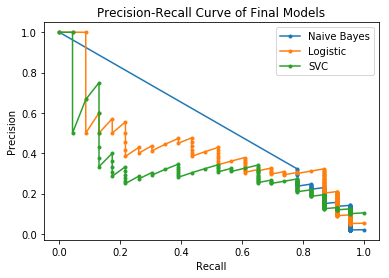

In [210]:
plt.plot(recall_nb, precision_nb, marker='.', label='Naive Bayes')
plt.plot(recall_lr, precision_lr, marker='.', label='Logistic')
plt.plot(recall_svc, precision_svc, marker='.', label='SVC')
# axis labels
plt.title('Precision-Recall Curve of Final Models')
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
plt.savefig("Precision Recall Curve of Final Models.png")
# show the plot
plt.show()


In [245]:
df = pd.DataFrame(data={'zip':illinois_holdout['zip'], 'gnb':y_pred_nb, 'lr':y_pred_lr, 'svc':y_pred_svc, 'prob_gnb':y_prob_nb[:,1], 'prob_lr':y_prob_lr[:,1], 'prob_svc':y_prob_svc[:,1], 'has_wf':y_test})

In [246]:
df.head()

,zip,gnb,lr,svc,prob_gnb,prob_lr,prob_svc,has_wf
3805,61432,0,0,0,1.702138e-26,0.000643,0.016875,0
3806,61378,0,0,0,1.233654e-82,0.001112,0.039874,0
3807,61410,0,0,0,7.331134e-22,0.001187,0.004387,0
3808,61420,0,0,0,8.367233e-28,0.000582,0.005104,0
3809,61440,0,0,0,1.915055e-27,0.000755,0.002222,0


In [247]:
df.to_csv('./il_predictions_with_prob.csv')